# Математичесий анализ. Лабораторная работа "CalcNet-93".

*Объявление:*
Если у Вас возникает какая-либо ошибка и вы совершенно не понимаете, что не так, то:

### `1. Внимательно изучите текст ошибки, ведь он зачастую подсказывает, что же не так;  `
### `2. Перечитайте внимательно код ещё раз;  `
### `3. Попросите помощи у одногруппников (!= писать их решения)/учебных ассистентов.`

Если возникнут вопросы по поводу формулировок задач, писать в tg (@WolfrahmMetallic для основной части/@optimist1938 для бонусной)

Особая благодарность Григорию Чайковскому(@chagrygoris) за потрясающие объяснения и визуализации в части, посвященной градиентному спуску, Семену Цинману (@optimist1938) за бонус про использование дифференирования в задаче edge detection

<h4 style="color: red"><b>Задание 0.1 [0.1 балла]</b></h4>
На протяжении всей лабы разбросаны непохожие на другие фрагменты текста - сложите из них фразу и напишите сюда

<h1 style="color:blue"><b>1. Интро в Sympy</b></h1>

In [8]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Вначале для простоты будем подключать модуль sympy целиком
# Запустите данный код
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

Для начала научимся строить графики функций от одной переменой. Например, $f(x) = 11x^4 + 3x^3 - 2x^2 - 10$

Построить график этой функции можно с помощью метода `plot`.

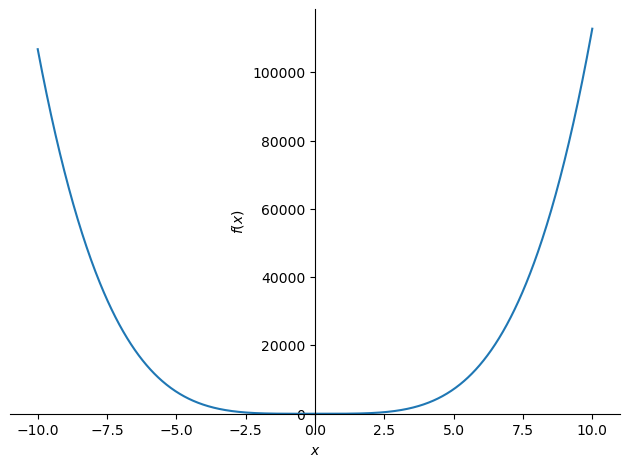

In [12]:
# Test this
x = sp.Symbol('x') # объект символа
f = 11*x**4 + 3*x**3 - 2*x**2 - 10
sp.plot(f)

В примере выше мы определили переменную `x`. Для этого воспользовались методом symbols(). Про его возможности можно ознакомиться вот [тут](hhttps://docs.sympy.org/latest/modules/core.html#sympy.core.symbol.symbols).

Можно задать интервал значений переменной, для которого треб<span style="color:red">у</span>ется построить график. Можно передавать выражение для функции в
качестве аргумента `plot`. Для того, чтобы задать интервал значений переменной, нужно указать значение необязательного параметра,
представляющего собой `tuple` из имени переменной, левого и правого конца интервала.
Если на одном графике нужно изобразить несколько функций, причем каждую на своем интервале, то при вызове `plot` перечисляются через
запятую `tuple`, состоящие из выражения для функции (или имени переменной, в которую это выражение записано) и `tuple`, описывающей
интервал значений функции (этот `tuple` состоит из имени переменной, левого и правого конца интервала).



А теперь построим на одном графике функции $\tan (x)$ на $[-\pi/3, \pi/3]$, $e^{x}$ на $[-2, 1]$ и $\ln{x}$ на $[0.1, 2]$

Составим список из функций и список из интервалов, на основе этих списков составим tuple, состоящий из tuple, содержащих выражение
для функции и tuple из имени переменной, левого и правого конца интервала.

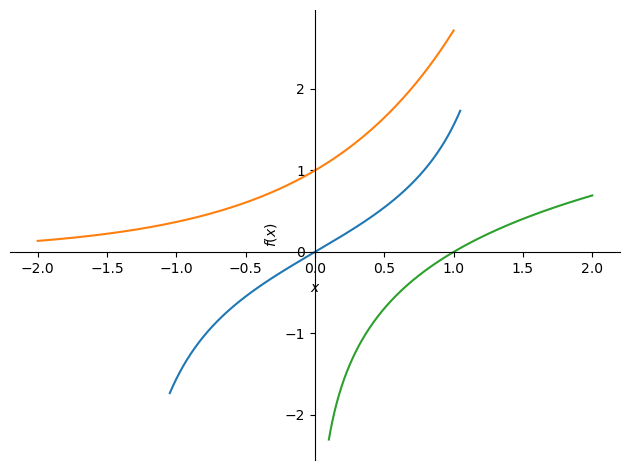

In [17]:
funcs = [sp.tan(x), sp.exp(x), sp.ln(x)]
intervals = [(-sp.pi/3, sp.pi/3), (-2, 1), (0.1, 2)]
n = len(funcs)
func_to_plot = tuple((funcs[i], (x, intervals[i][0], intervals[i][1])) for i in range(n))
sp.plot(*func_to_plot)

Цвет линии определяется параметром `line_color`, который по умолчанию равен `blue`.

Для того, чтобы на одном графике вывести несколько функций разных цветов нужно создать несколько графиков с помощью plot, но не
изображать их, а собрать в список с помощью append. Для того, чтобы график не изображался, изменим параметр show,
равный по умолчанию True.

Построим на одном графике функции $x^2, cos(x)$ на $[-\pi, \pi]$, изобразив каждую из них желаемым цветом.

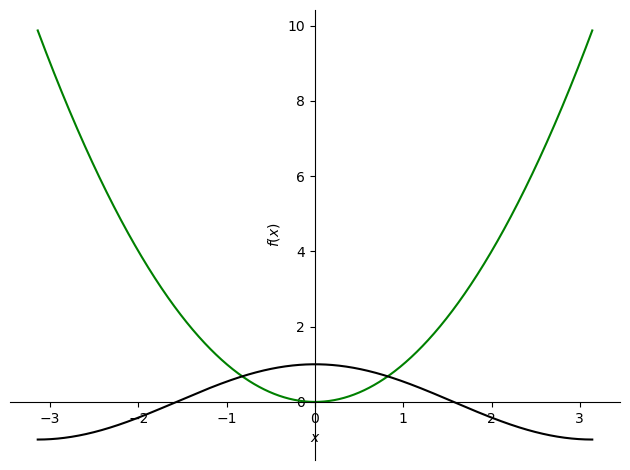

In [19]:
interval = (x, -sp.pi, sp.pi)
p = sp.plot(x**2, interval, line_color='green', show=False)
p.append(sp.plot(sp.cos(x), interval, line_color='black', show=False)[0])
p.show()

Кстати у `plot` есть ещё куча аргументов, с которыми при желании Вы сможете ознакомиться на сайте:
https://docs.sympy.org/latest/modules/plotting.html?highlight=plot#module-sympy.plotting.plot

<h4 style="color: red"><b>Задание 1.1 [2 балла]</b></h4>

Построить график $\frac{1}{\cos(x)}$ на интервале $(\pi, 5\pi)$ <span style="color: blue">б</span>ез асимптот, задать предел по вертикальной оси (-10, 10). Подписать графики

*Предел определяется параметром `xlim` либо `ylim`.*

*Указание:*

График разбить на части, исключив точки разрыва. При построении `tuple` с именем переменной и интервалом ее значений от точки разрыва
отступить на 0.01, т.е. использовать $(x, \pi + 0.01, 2\pi - 0.01)$ вместо $(x, \pi, 2\pi)$.
Для удобства пользуйтесь циклом $for$, чтобы создать `tuple`, состоящий из `tuple`, содержащих выражение для функции и `tuple` из имени
переменной, левого и правого конца интервала.
Не забудьте об $y_{lim}=(-10, 10)$!


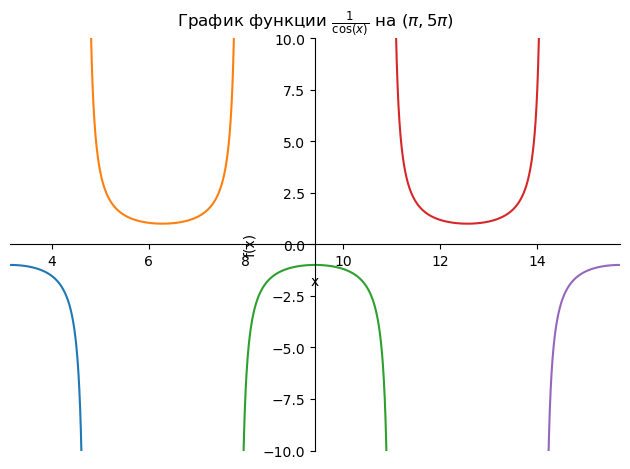

In [23]:
intervals = (
    (sp.pi + 0.01, 3*sp.pi/2 - 0.01),
    (3*sp.pi/2 + 0.01, 5*sp.pi/2 - 0.01),
    (5*sp.pi/2 + 0.01, 7*sp.pi/2 - 0.01),
    (7*sp.pi/2 + 0.01, 9*sp.pi/2 - 0.01),
    (9*sp.pi/2 + 0.01, 5*sp.pi - 0.01)
)

plots = tuple((1/sp.cos(x), (x, a, b)) for a, b in intervals)

sp.plot(*plots,
       ylim=(-10, 10),
       title=r'График функции $\frac{1}{\cos(x)}$ на $(\pi, 5\pi)$',
       xlabel='x',
       ylabel='f(x)',
       xlim=(float(sp.pi), float(5*sp.pi)))

Построить на отрезке $[−4\pi, 4\pi]$ график $\sin(𝑥 / \pi)$ синим цветом, а график $\cos(𝑥 / 3)$ красным, задать предел по вертикальной оси $(-2.5, 2.5)$.


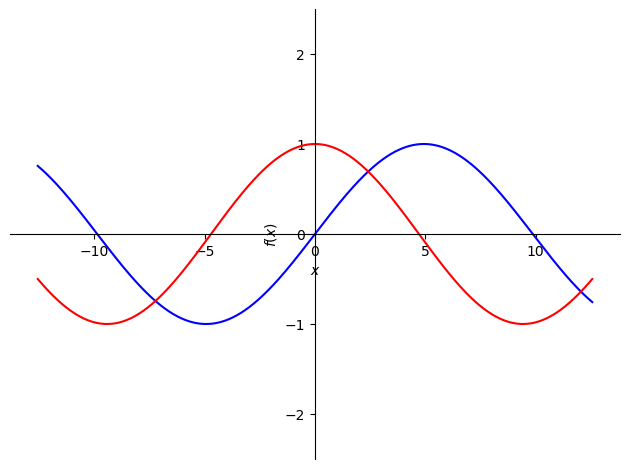

In [25]:
interval = (x, -4 * sp.pi, 4 * sp.pi)
p = sp.plot(sp.sin(x/sp.pi), interval, line_color = 'b', show = False)
p.append(sp.plot(sp.cos(x/3), interval, line_color = 'r', show = False)[0])
p.ylim = (-2.5, 2.5)
p.show()

#### График неявно заданной функции



Изобразить график уравнения, например, <span style="color:blue">о</span><span style="color:red">к</span>ружности, удобнее с помощью функции `plot_implicit`.

 Уравнение неявно заданной функции
передается `plot_implicit` как `Equality`, сокращенно `Eq`. Аргументами `Eq` выступают левая и правая части уравнения (*lhs* и *rhs* соответственно).

Построим график функции $cos(x^2 + y^2) =  tan(x^2 + y^2) \cdot cos(x + y)$

*Примечание: будьте терпеливыми*

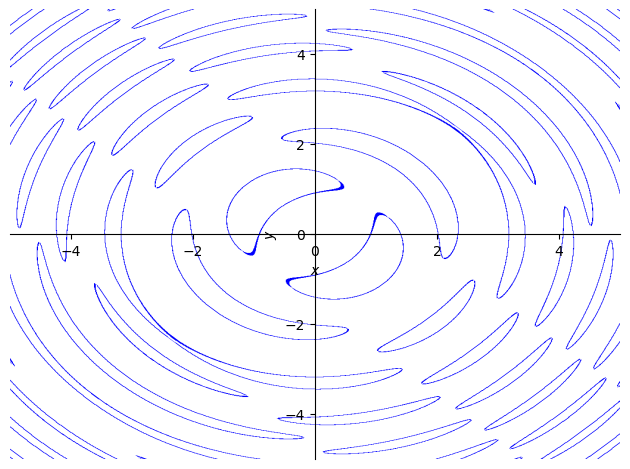

In [30]:
x, y = sp.symbols('x y')
sp.plot_implicit(sp.Eq(sp.cos(x**2 + y**2), sp.tan(x**2 + y**2) * sp.cos(x + y)),
 (x, -5, 5),
 (y, -5, 5),
)

А теперь построим график функции $tan(x \cdot sin(x)) = tan(y \cdot sin(y))$

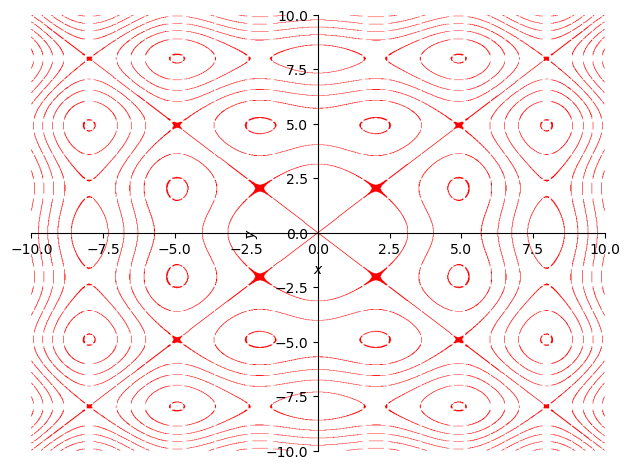

In [32]:
x, y = sp.symbols('x y')
sp.plot_implicit(sp.Eq(sp.tan(x * sp.sin(x)), sp.tan(y * sp.sin(y))),
 (x, -10, 10),
 (y, -10, 10),
  line_color='red'
)

<h4 style="color: red"><b>Задание 1.3 [1 балла]</b></h4>


Придумайте сами такую неявно заданную функцию, график которой выглядит достаточно забавно и красиво.

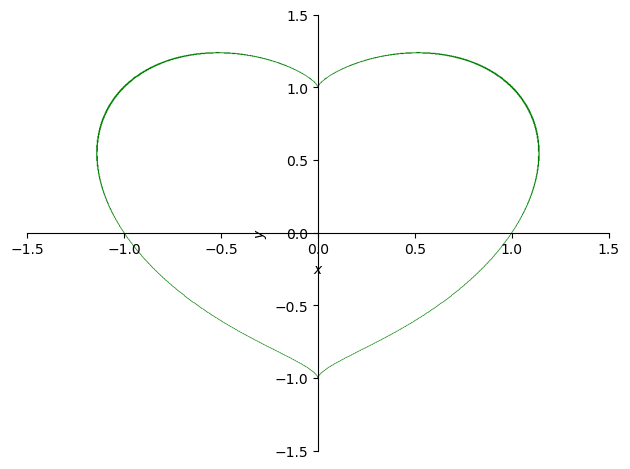

In [34]:
x, y = sp.symbols('x y')
sp.plot_implicit(sp.Eq((x**2 + y**2 - 1)**3, x**2*y**3),
 (x, -1.5, 1.5),
 (y, -1.5, 1.5),
  line_color='green'
)

<h2 style="color: blue"><b>Производные</b></h2>


Продолжаем работать с секцией Calculus библиотеки SymPy. В этой части вам необходимо ознакомиться с возможностью считать производные и выводить красивые ответы. Библиотека позволяет быстро найти производную практически любой заданной функции.


In [37]:
#необходимые библиотеки для этого раздела
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, S
from sympy import sin, exp
%matplotlib inline

В sympy производная находится аналитически с помощью `diff`, эту функцию можно использовать и как метод. Покажем на примере оба варианта вызова `diff`.

Найдем производную $f(x) = x^2 - \sin x$.

Вначале применим `diff` как функцию, ее аргументы - функция или выражение и имя переменной.

В нашем примере зададим $f(x)$ как выражение.

In [39]:
from sympy.abc import x  #альтернативный способ определения символа
f = x**2 - sin(x)
diff(f, x)

2*x - cos(x)

Теперь применим `diff` как метод, аргумент - имя переменной:

In [41]:
f.diff(x)

2*x - cos(x)

Порядок производной является необязательным аргументом `diff` со значением по умолчанию 1. Для вычисления производный высоких порядков нужно указать порядок производной.

Например: Найдем производную второго порядка для функции $f(x) = x^2 - \sin x$.

Опишем $f(x)$ как функцию. Применим `diff` как метод.

In [43]:
def f(x):
    return x**2 - sin(x)
f(x).diff(x, 2)

sin(x) + 2

Производные можно считать от функций с несколькими переменными.

Например: возьмем функцию $$f(x, y) = x^{123} \cdot y + y^{34} \cdot x^4$$



In [45]:
x, y = sp.symbols('x y')
func = (x ** 123) * y + (y ** 34) * (x ** 4)
div_func = diff(func, x)
div_func

123*x**122*y + 4*x**3*y**34

Коротко о том что мы сделали: мы записали в переменную функцию `func` для которой мы хотим посчитать производную.
После всего этого в следующей строке мы воспользовались методом `diff` где вторым параметром указали по какой переменной мы хотим считать производную первого порядка (мы считали по`x`).

Теперь посчитаем по `y`

In [48]:
x, y = sp.symbols('x y')
func = (x ** 123) * y + (y ** 34) * (x ** 4)
div_func2 = diff(func, y)
div_func2

x**123 + 34*x**4*y**33

P.S. В этом разделе будет полезно ознакомиться с документацией.

Про производные можно ознакомиться [тут](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#calculus).

 Про метод `diff` и все его вытекающие можно ознакомиться [здесь.](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.diff)

<h4 style="color: red"><b>Задание 1.4 [3 балла]</b></h4>

Написать функцию `def check_diff(seq: sympy.core.mul.Mul, x: sympy.Symbol, a: float) -> bool` для проверки дифференцируемости заданной функции в точке.

In [51]:
def check_diff(seq: sympy.core.mul.Mul, x: sympy.Symbol, a: float) -> bool:
    try:
        f_val = seq.subs(x, a)
        if not f_val.is_finite:
            return False

        f_prime = sp.diff(seq, x)
        f_prime_val = f_prime.subs(x, a)

        return bool(f_prime_val.is_finite)
        
    except (TypeError, ValueError, NotImplementedError):
        return False

<h2 style="color: blue"><b>Интегралы</b></h4>


In [53]:
import sympy as sp

Так как `sympy` предлагает возможности символьного дифференцирования, то очевидно, он предлагает возможности символьного интегрирования.

Основной функционал заключен в методе `sympy.integrate`

Так, если использовать эту функцию в виде `sympy.integrate(func, variable)`, где `variable is sympy.Symbol`, то функция посчитает неопределенный интеграл этой функции по символу `variable`

Пример: 
$$
f(x) = \ln x
$$

In [58]:
x = sp.Symbol('x')

f = sp.ln(x)

sp.integrate(f, x)

x*log(x) - x

Если же добавить два аргумента `a: float, b: float` и передать в функцию в функцию вторым аргументом кортеж `(variable, a, b)`, то функция будет считать определенный интеграл на $[a, b]$

На том же примере:

In [60]:
sp.integrate(f, (x, np.exp(1), np.exp(10)))

198238.192153260

<h4 style="color:red"><b>Задание 1.5 [1 балл]</b></h4>

посчитайте интеграл 
$$
f(x) = 3x^2 \arctan x
$$

In [62]:

x = sp.Symbol('x')
f = 3 * x**2 * sp.atan(x)

res = sp.integrate(f, x)
print("\n")
sp.pprint(res)
print("------------------------------------------------")

print("Определённый интеграл от e³ до 50:")
sp.pprint(sp.integrate(f, (x, np.e**3, 50)).evalf()) 



              2      ⎛ 2    ⎞
 3           x    log⎝x  + 1⎠
x ⋅atan(x) - ── + ───────────
             2         2     
------------------------------------------------
Определённый интеграл от e³ до 50:
180477.300970475


И посчитайте его на интервале $[e^3, 50]$

Довольно интересные методы расположены в блоке [`Internals`](https://docs.sympy.org/latest/modules/integrals/integrals.html#internals)

Например, ф-ия `sympy.integrals.rationaltools.ratint` считает интегралы от рациональных функций

Например:

In [66]:
sp.integrals.rationaltools.ratint(36/(x**5 - 2*x**4 - 2*x**3 + 4*x**2 + x - 2), x)

(12*x + 6)/(x**2 - 1) + 4*log(x - 2) - 4*log(x + 1)

<h4 style="color:red"><b>Задание 1.6 [1 балл]</b></h4>

Посчитайте интеграл
$$
f(x) = \frac{1}{x(x+1)(x^2+x+1)}
$$

In [68]:
x = sp.Symbol('x')

f = 1 / (x * (x + 1) * (x**2 + x + 1))

sp.integrals.rationaltools.ratint(f, x)


log(x) - log(x + 1) - 2*sqrt(3)*atan(2*sqrt(3)*x/3 + sqrt(3)/3)/3

<h2 style="color:blue"><b>Multidimensional functions</b></h2>

<h4 style="color:red"><b>Задание 1.7 [3 балл]</b></h4>


Изобразить функцию  $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ на листке бумаги, казалось бы, невозможно. Однако с этой задачей справлялись топографы задолго до изобретения 3D-графики, составляя карты рельефа.

На двумерной карте рельефа каждой точке мы сопоставляем цвет, который отображает некоторую физическую величину, например, высоту над уровнем моря. Аналогично, каждой точке на декартовых координатах мы можем сопоставить значение некоторой функции в ней.

Для создания такого графика мы будем использовать библиотеки ``matplotlib`` и ``numpy``. На самом деле, когда вы писали ``plot(...)``, передавая в качестве аргументов объекты-функции модуля ``sympy``, ``plot`` передавала работу библиотекам  ``matplotlib`` и ``numpy``. Простота такого подхода компенсируется его ограниченностью. Чтобы увеличить возможности по визуализации, необходимо выбрать более низкоуровневый подход.


Ваша задача - визуализировать функцию $f(x, y) = e^{-x^2 - y^2}$ на $[-4; 4] \times [-4; 4]$ с использованием библиотеки ``matplotlib`` и цветного рисунка. Добавить ``colorbar``, оси подписать, добавить название графика.

>подсказка: для создания множества значений функций вам поможет функция ``np.meshgrid``

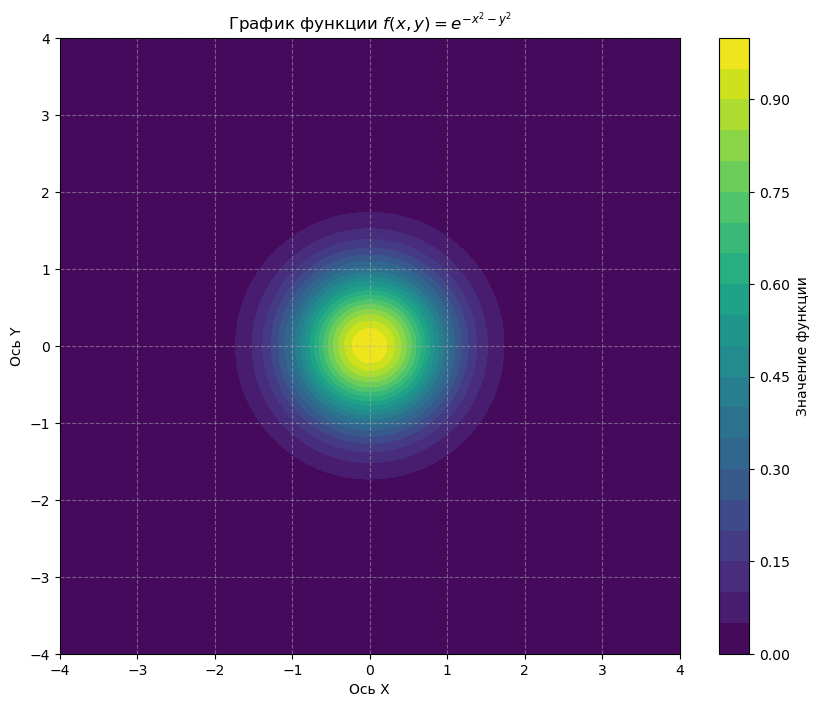

In [72]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

Z = np.exp(-X**2 - Y**2)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Значение функции')

plt.title(r'График функции $f(x, y) = e^{-x^2-y^2}$')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

<h4 style="color:red"><b>Задание 1.8 [0.75 балл]</b></h4>

Есть ли у функции точка локального минимума или максимума? Что это за точка (минимум/максимум + координаты) 

Из графика понятно, что точка (0,0) - локальный максимум. Далее функции стремится к 0.

<h4 style="color:red"><b>Задание 1.9 [1.5 балл]</b></h4>


Вернёмся к более прямолинейному подходу и попробуем нарисовать $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ с помощью трёхмерной графики. Для этого также следует использовать библиотеку ``matplotlib``. Узнайте, как делать трёхмерные графики с помощью методов `plt.axes(projection='3d')` и  `plt.countour3D`  и визуализируйте функцию $f(x, y) = e^{-x^2 - y^2}$ на $[-4; 4] \times [-4; 4]$. Оси подписать, добавить название графика. `np.meshgrid` также поможет и тут

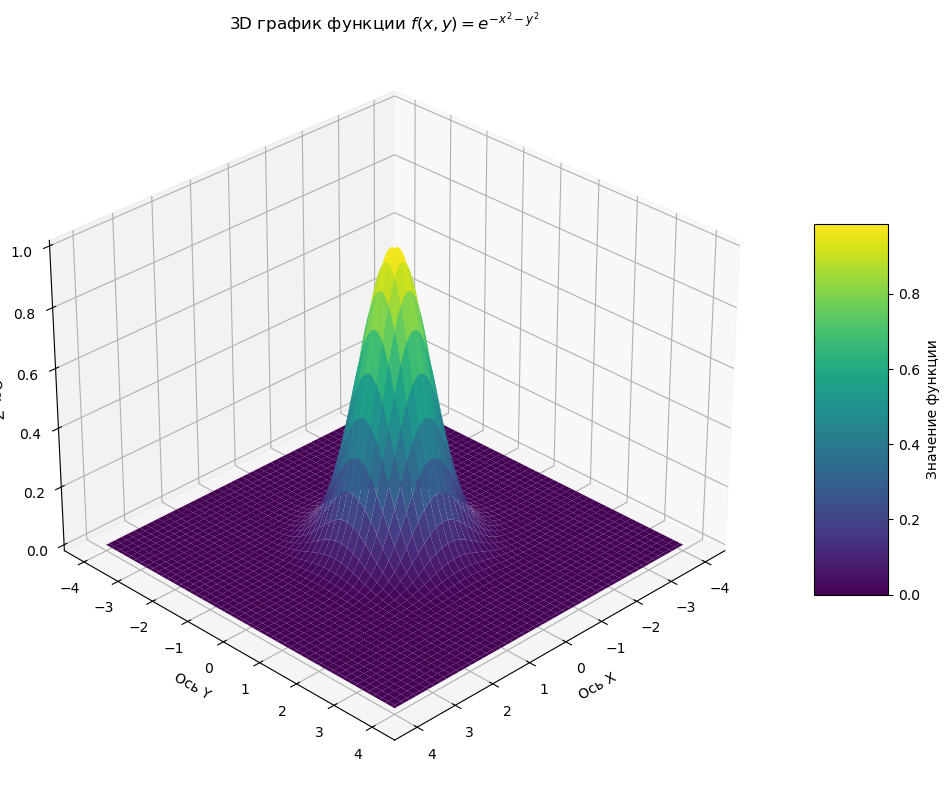

In [76]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

Z = np.exp(-X**2 - Y**2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

fig.colorbar(surf, shrink=0.5, aspect=5, label='Значение функции')

ax.set_title(r'3D график функции $f(x, y) = e^{-x^2-y^2}$')
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')

ax.view_init(elev=30, azim=45)
plt.tight_layout()

plt.show()

<h4 style="color:red"><b>Задание 1.10 [1.5 балл]</b></h4>


Нарисованный 3d график позволяет увидеть только одну проекцию данного изображения. Поверхность заслоняет всё, что находится за ней. Самое лучшее решение - сделать карту интерактивной с возможностью её поворачивать. Для этих целей существует библиотека `plotly`.

Визуализируйте функцию $e^{-x^2 - y^2}$ на $[-4; 4] \times [-4; 4]$, график подпишите.

In [78]:
# установка библиотеки, если она отсутствует
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


С помощью методов `plotly.graph_objects` `Figure`, `updae_traces`, `update_layout` и объекта `Surface`

In [80]:
import plotly.graph_objects as go
import numpy as np

def f(x, y):
    return np.exp(-x**2 - y**2)

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

fig.update_traces(
    contours_z=dict(
        show=True,
        usecolormap=True,
        highlightcolor="limegreen",
        project_z=True
    )
)

fig.update_layout(
    title='Интерактивный 3D график функции f(x,y) = e<sup>-x²-y²</sup>',
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='Ось X',
        yaxis_title='Ось Y',
        zaxis_title='Ось Z',
        camera_eye=dict(x=1.87, y=0.88, z=0.64)
    )
)

fig.show()

<h4 style="color:red"><b>Задание 1.11* [3 балл]</b><span style="color:gold">(бонус)</span></h4> 

Реализуйте ещё один способ визуализации графиков функций $\mathbb{R}^2 \rightarrow \mathbb{R}$ (вспомните лекции или придумайте способ самостоятельно).

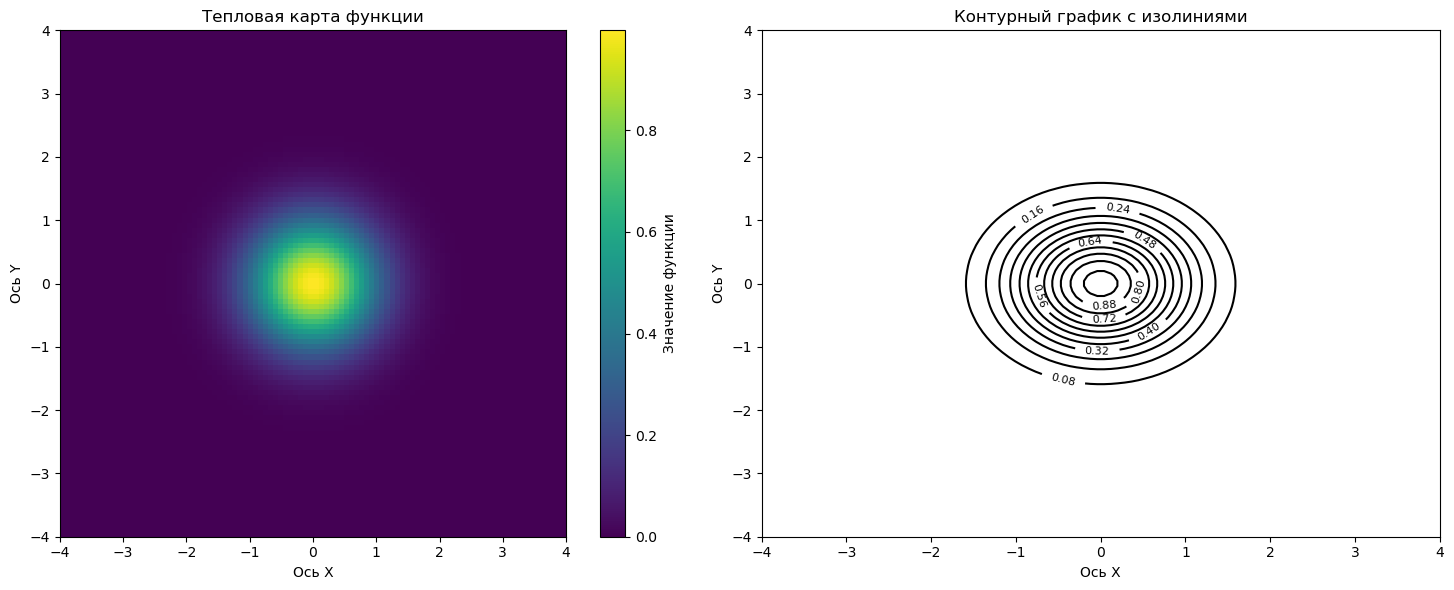

In [82]:

def f(x, y):
    return np.exp(-x**2 - y**2)

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Тепловая карта
heatmap = ax1.imshow(Z, extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
ax1.set_title('Тепловая карта функции')
ax1.set_xlabel('Ось X')
ax1.set_ylabel('Ось Y')
fig.colorbar(heatmap, ax=ax1, label='Значение функции')

# 2. Контурный график с изолиниями
contour = ax2.contour(X, Y, Z, levels=15, colors='black')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_title('Контурный график с изолиниями')
ax2.set_xlabel('Ось X')
ax2.set_ylabel('Ось Y')

plt.tight_layout()
plt.show()

<h4 style="color:red"><b>Задание 1.12* [3 балл]</b><span style="color:gold">(бонус)</span></h4> 


Визуализировать функцию $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$

Поскольку мы ограничены тремя измерениями, в полной мере визуализировать функцию $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ не представляется возможным. Тем не менее, мы можем представить такую функцию как некоторую трансформацию числовой плоскости ([здесь](https://youtu.be/sD0NjbwqlYw?si=gfqBWQE2E2LRjjjT) и [здесь](https://www.youtube.com/watch?v=bohL918kXQk&t=286s) хорошо объяснён и изображён механизм трансформации числовой плоскости на примере дзета-функции Римана). Имеется в виду, что каждой точке числовой плоскости мы сопоставляем какую-то другую точку той же самой плоскости (аналогично с тем, как при визуализации школьных функций мы каждой точке из $\mathbb{R}$ сопоставляем точку из $\mathbb{R}$).

Для примера рассмотрим такую трансформацию: $f(x, y) = (-x, y)$. То есть каждой точке нашей плоскости сопоставляем точку, отражённую относительно оси OY. Можно думать, что мы взяли какое-то произвольное множество (например, множество синих точек) и изобразили множество, куда оно переходит под нашей трансформацией (красное множество).

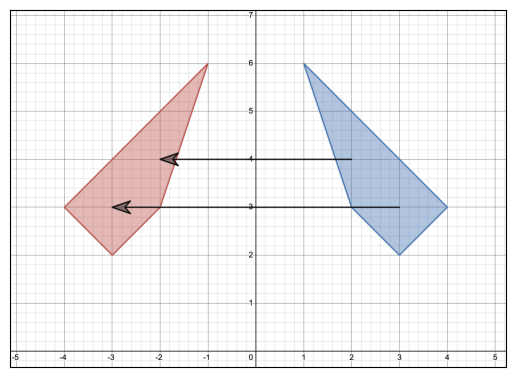

In [85]:
plt.imshow(plt.imread("transformation.png"))
plt.xticks([])
plt.yticks([])
plt.show()

 Множество, на котором мы рассматриваем трансформацию, может быть произвольным: точкой, прямой, кругом или чем-то ещё. Но чаще всего для таких отображений рассматривают трансформацию отрезков. Ваша задача - написать функцию которая будет визуализировать отображение $f(x, y) = (x \cos(y), x \sin(y))$ на $[-2; 2] \times [-2; 2]$  вышеописанным способом. 
 
Вы должны показать отображение не менее 5 вертикальных и 5 горизонтальных прямых. Кривые до и после отображения следует визуализировать на двух различных графиках с помощью функции ``plt.subplots``. (Подписать всё как и в прошлых пунктах)

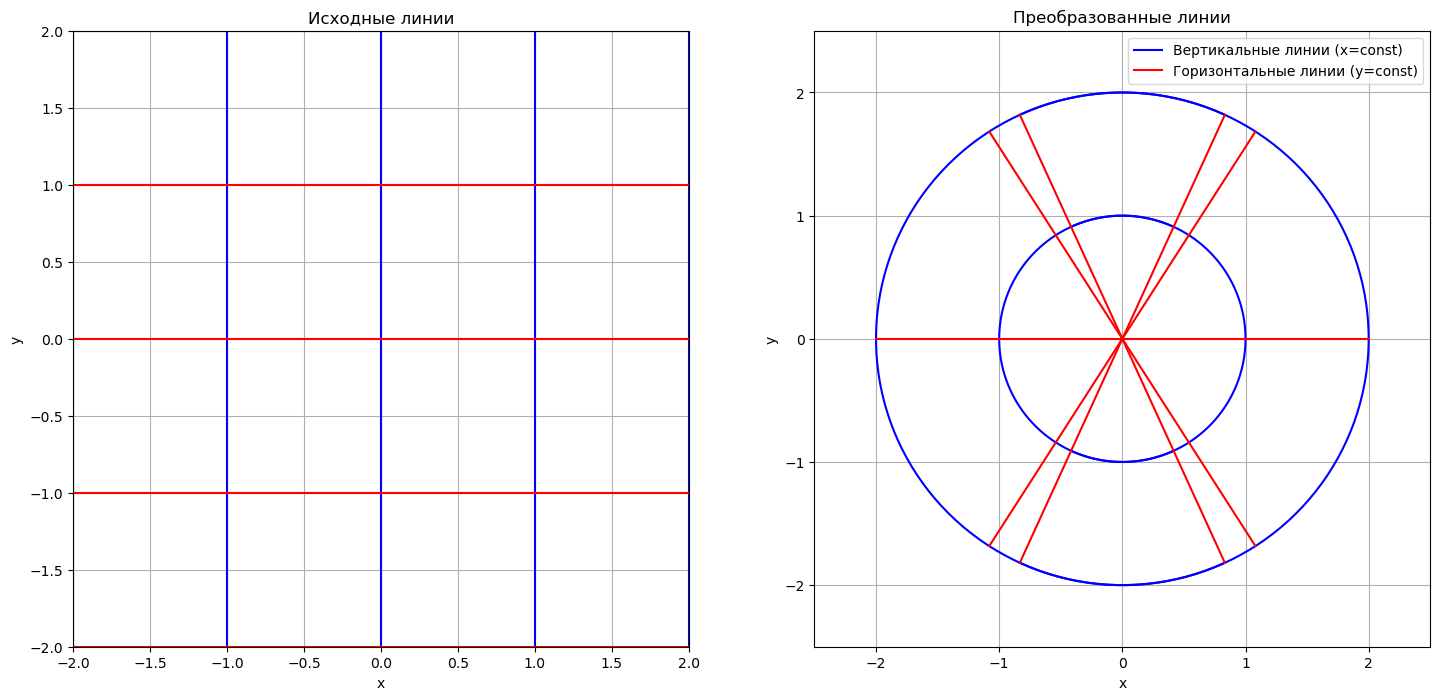

In [87]:
def f(x, y):
    return (x * np.cos(y), x * np.sin(y))

def draw_transform(f, x_lines=np.linspace(-2, 2, num=5), y_lines=np.linspace(-2, 2, num=5)):
    t = np.linspace(-2, 2, 100)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    ax1.set_title('Исходные линии')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.grid(True)
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')

    for x_val in x_lines:
        ax1.plot([x_val]*len(t), t, 'b-')

    for y_val in y_lines:
        ax1.plot(t, [y_val]*len(t), 'r-')

    ax2.set_title('Преобразованные линии')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.grid(True)
    ax2.set_xlim(-2.5, 2.5)
    ax2.set_ylim(-2.5, 2.5)
    ax2.set_aspect('equal')

    for x_val in x_lines:
        x_trans, y_trans = f([x_val]*len(t), t)
        ax2.plot(x_trans, y_trans, 'b-', label=f'x={x_val:.1f}' if x_val == x_lines[0] else "")
    for y_val in y_lines:
        x_trans, y_trans = f(t, [y_val]*len(t))
        ax2.plot(x_trans, y_trans, 'r-', label=f'y={y_val:.1f}' if y_val == y_lines[0] else "")

    ax2.legend(handles=[
        plt.Line2D([0], [0], color='b', label='Вертикальные линии (x=const)'),
        plt.Line2D([0], [0], color='r', label='Горизонтальные линии (y=const)')
    ])
    
    plt.tight_layout()
    plt.show()

draw_transform(f)

<h4 style="color:red"><b>Задание 1.13 [1.5 баллa]</b></h4>

Непрерывно дифференцируемое преобразование локально выглядит также, как и некоторое линейное преобразование. Как найти это линейное преобразование?

Для непрерывно дифференцируемого преобразования f:R2→R2 линейное приближение в окрестности точки (a,b) задаётся его матрицей Якоби — матрицей первых частных производных компонент функции. Эта матрица описывает, как малые изменения входных переменных (x,y) преобразуются в изменения выходных значений.


<h4 style="color:red"><b>Задание 1.17 [3 баллa]</b></h4>


Сравните локально два ото<span style="color:red">б</span>ражения: изначальное и его линейное приближение. Возьмите достаточно маленькую окрестность точки (0.5, 1). Выберите как минимум 5 прямых для наглядности.

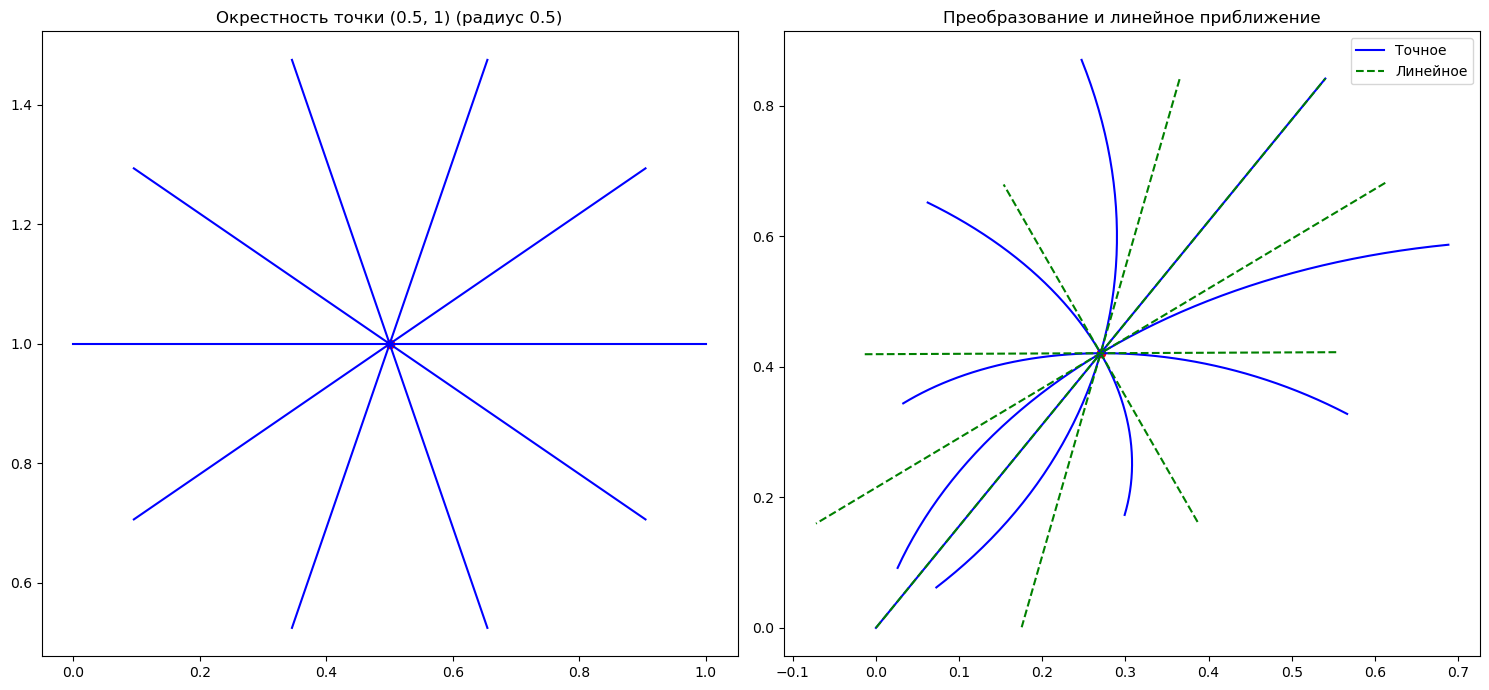

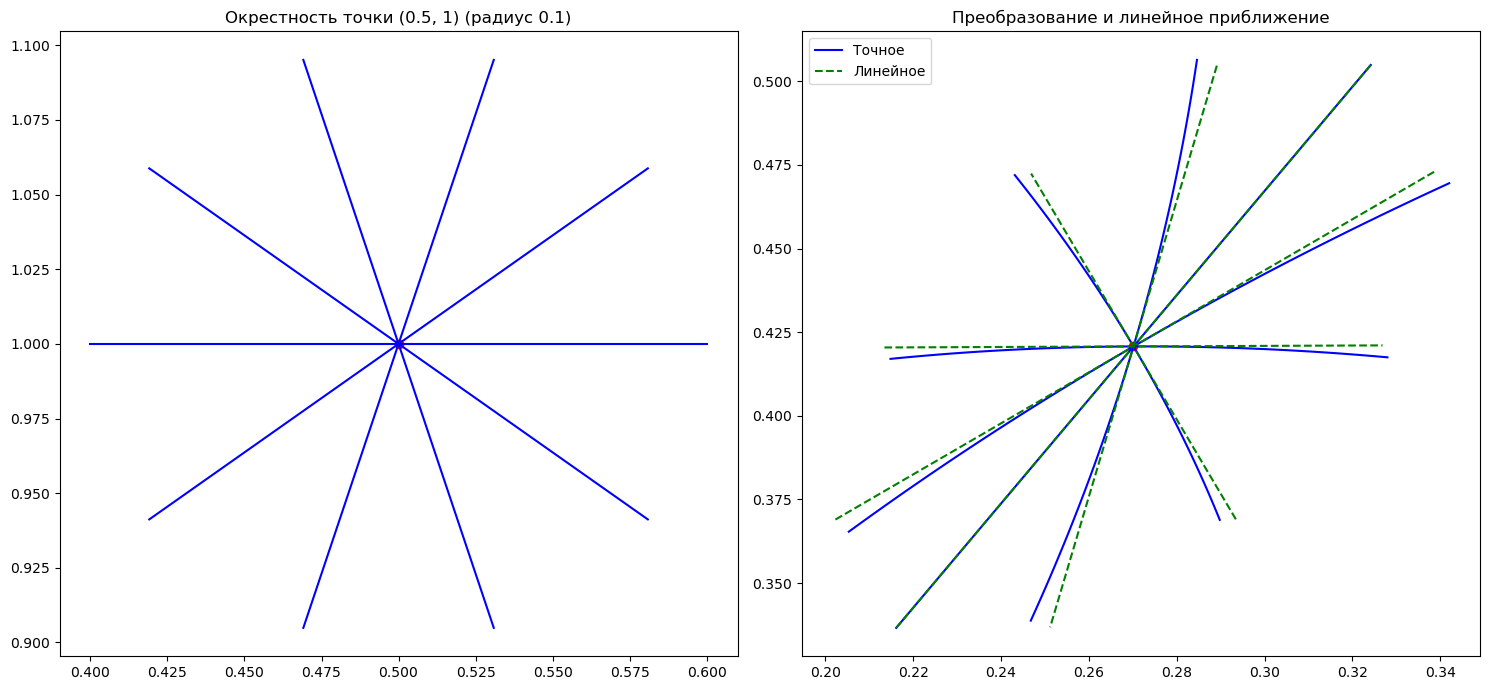

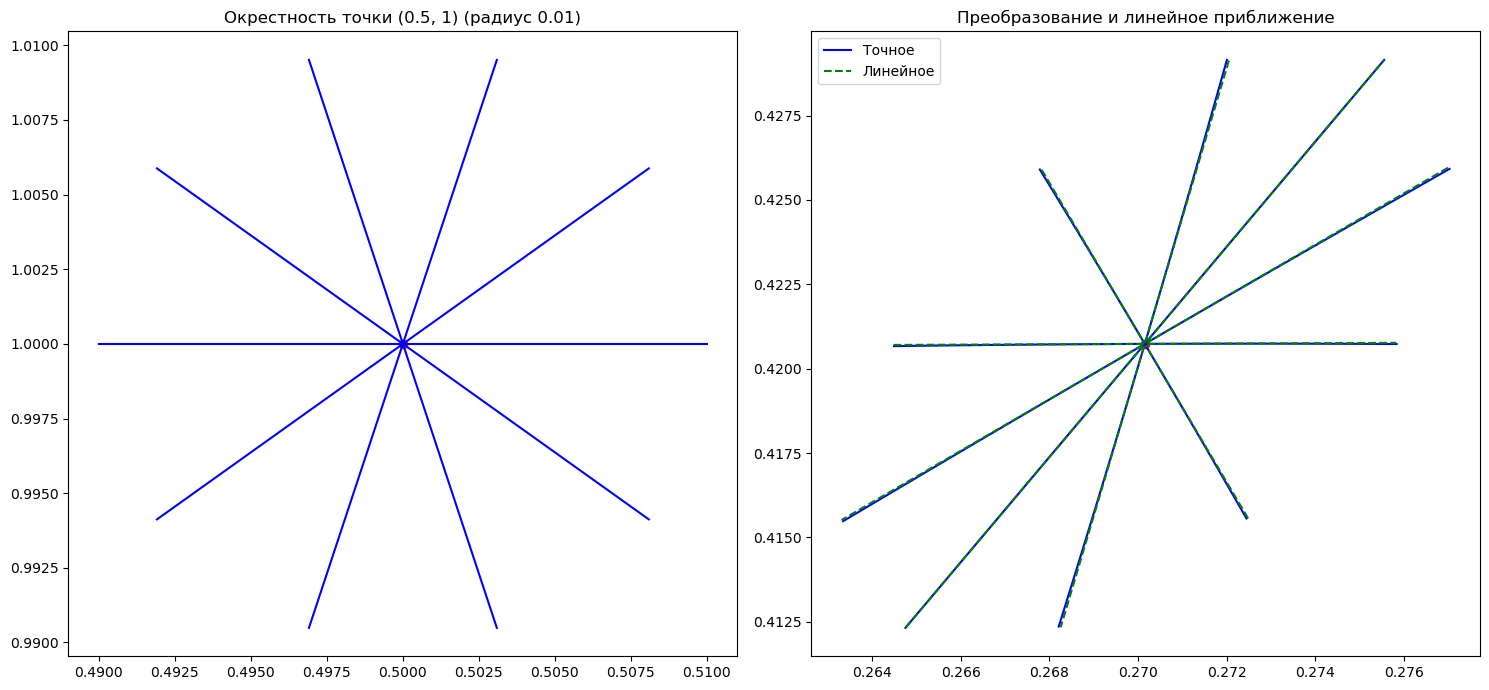

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x*np.cos(y), x*np.sin(y)

def jacobian_approx(x, y, dx=0.01, dy=0.01):
    f_x_plus = f(x + dx, y)
    f_x_minus = f(x - dx, y)
    df_dx = [(f_x_plus[0] - f_x_minus[0])/(2*dx), 
             (f_x_plus[1] - f_x_minus[1])/(2*dx)]
    
    f_y_plus = f(x, y + dy)
    f_y_minus = f(x, y - dy)
    df_dy = [(f_y_plus[0] - f_y_minus[0])/(2*dy), 
             (f_y_plus[1] - f_y_minus[1])/(2*dy)]
    
    return np.array([df_dx, df_dy]).T

def linear_approx(p, J, h):
    return (p[0] + J[0,0]*h[0] + J[0,1]*h[1], 
            p[1] + J[1,0]*h[0] + J[1,1]*h[1])

def draw_transform_comparison(f, point=(0.5,1), radius=0.1, n_lines=5):
    J = jacobian_approx(*point)
    f_point = f(*point)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    
    angles = np.linspace(0, 2*np.pi, n_lines, endpoint=False)
    lines = []
    for angle in angles:
        line_x = [point[0] + radius*np.cos(angle)*t for t in np.linspace(-1,1,50)]
        line_y = [point[1] + radius*np.sin(angle)*t for t in np.linspace(-1,1,50)]
        lines.append((line_x, line_y))

    ax1.set_title(f'Окрестность точки {point} (радиус {radius})')
    ax1.plot(point[0], point[1], 'ro')
    for line_x, line_y in lines:
        ax1.plot(line_x, line_y, 'b-')
    
    ax2.set_title('Преобразование и линейное приближение')
    ax2.plot(f_point[0], f_point[1], 'ro')
    for line_x, line_y in lines:
        fx, fy = f(np.array(line_x), np.array(line_y))
        ax2.plot(fx, fy, 'b-', label='Точное' if line_x == lines[0][0] else "")

        hx = np.array(line_x) - point[0]
        hy = np.array(line_y) - point[1]
        lin_fx, lin_fy = linear_approx(f_point, J, np.array([hx, hy]))
        ax2.plot(lin_fx, lin_fy, 'g--', label='Линейное' if line_x == lines[0][0] else "")
    
    ax2.legend()
    plt.tight_layout()
    plt.show()

radii = [0.5, 0.1, 0.01]
for r in radii:
    draw_transform_comparison(f, radius=r)

Объясните что произошло. Сравните разные возможные окрестности заданной точки.

Малое отклонение (radius=0.01):

    Линейное приближение почти совпадает с точным преобразованием (синий)

    Подтверждает, что преобразование локально ведет себя как линейное

Среднее отклонение (radius=0.1):

    Видно небольшое расхождение между точным и приближенным преобразованием

    Кривизна преобразованных линий становится заметной

Большое отклонение (radius=0.5):

    Линейное приближение значительно расходится с точным преобразованием

    Проявляется нелинейная природа исходного отображения

Вывод:
Линейное приближение, заданное матрицей Якоби, хорошо описывает локальное поведение отображения в малой окрестности точки. С увеличением области приближения точность снижается из-за нелинейных эффектов.

<h1 style="color:blue"><b>2. Численные методы анализа</b></h1>


<h3 style="color:blue"><b>Производные</b></h4>


Производные в целом очень удобно считаются даже через определение:

$$
f'(x) = \lim_{\Delta x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

Но, конечно, программно работать с понятием "предел" невозможно - у нас есть программные ограничения на количество цифр в числе. Поэтому мы не можем работать с бесконечно малыми значениями - для процессора они все равны 0.

Поэтому даже чтобы посчитать предел примерно, достаточно взять какую-то изначально очень маленькую $\Delta x$ (вроде $<10^{-9}$) и получить приближенное значение предела.

Пример: $f(x) = x^2$

In [100]:
# А ещё учимся писать хороший код
from typing import Callable 

In [101]:
def find_derivative(f: Callable, x: float, Delta_X = 1e-9):
    return (f(x+Delta_X) - f(x))/Delta_X

In [102]:
def f(x):
    return x*x


<h4 style="color:red"><b>Задание 2.1 [1 балл]</b></h4>

Теперь ваша задача найти производную для функции 
$$
g(x) = \sin(\cos(x))
$$

В точках $-\pi, 0; \frac{\pi}{100}; 1$ и сравнить с реальным ответом

In [104]:
def find_derivative(f: Callable, x: float, Delta_X=1e-9):
    return (f(x + Delta_X) - f(x)) / Delta_X

def g(x: float):
    return np.sin(np.cos(x))

points = [-np.pi, 0, np.pi/100, 1]

for x in points:
    deriv = find_derivative(g, x)
    print(f"g'({x:.3f}) ≈ {deriv:.6f}")

g'(-3.142) ≈ 0.000000
g'(0.000) ≈ 0.000000
g'(0.031) ≈ -0.016984
g'(1.000) ≈ -0.721606


$$
y' = -cos(cos(x))sin(x)
$$
$$
y'(-\pi) = 0
$$
$$
y'(0) = 0
$$
$$
y'(\frac{\pi}{100}) = -0,0169843
$$
$$
y'(1) = -0,721606
$$

<h2 style="color:blue"><b>Метод Ньютона-Рафсона решения вещественных уравнений<b></h2>


Это численный метод вычисления корней функций, т.е. нахождения решений уравнений вида $f(x) = 0$.

Суть метода заключается в следующем:

1. Мы берем изначальное значение $x_0$
2. Считаем значение 
   $$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$
3. Продолжаем итерироваться и считать $(n+1)$-ый элемент последовательности 
   $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
4. Останавливаем итерацию, когда достигаем достаточно хорошей точности.

<span style="color: red">При это важно понимать, что метод не универсальный!</span>

Метод работает, если выполняются следующие условия:
1. $f'(x_n) \ne 0$
2. $x_0$ подобран достаточно близко к корню

Вообще говоря, метод основан на том, что мы можем аналитически посчитать производную, что мы не всегда можем делать. Но это дает нам квадратичную сходимость к желаемому корню, то есть 
> the difference between the root and the approximation is squared (the number of accurate digits roughly doubles) at each step
> 
Поэтому он и настолько важен -- мы можем тратить меньше мощностей на решение таких задач. 

Но, например, если производная не очень хорошо себя ведет в окрестности корня, то мы в некоторых случаях не можем сойтись к нему. Как пример возьмем $f(x) = x^{1/3}$, тогда 
$$
{\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}=x_{n}-{\frac {x_{n}^{1/3}}{{\frac {1}{3}}x_{n}^{-2/3}}}=-2x_{n}.}
$$
И последовательность вообще расходится. Но все-таки из-за того насколько последовательность быстро сходится, если она сходится, метод очень востребован

<h3>Рассмотрим пример:</h3> 

$$f(x) = x^2-2$$

In [111]:
def f(x):
    return x*x-2

def f_prime(x):
    return 2*x

max_iterations = 10000
x0 = 1.2
eps = 1e-9
tolerance = 1e-9
for _ in range(max_iterations):
    if f_prime(x0) < eps:
        print("Точно в экстремум! Метод отказывается работать перед таким величием")
        break

    x1 = x0 - f(x0)/f_prime(x0)

    if abs(x1-x0) <= tolerance:
        print("Root is equal to ", x1)
        break

    x0 = x1

Root is equal to  1.414213562373095


<h4 style="color:red"><b>Задание 2.2 [3 балл]</b></h4>

Но код отвратительный, поэтому вы сейчас будете искать решение уравнения $\cos(x) = x^3$, то есть искать корень уравнения $f(x) = \cos(x) - x^3 = 0$. А также решить приближенно уравнение $g(x) = e^{2x} - 2 = 0$. В качестве $x_{0f}$ можете взять $0.5$, а $x_{0g} - 1$ 

In [113]:
def f(x: float):
    return np.cos(x) - x**3

def f_prime(x: float):
    return -np.sin(x) - 3*x**2

def g(x: float):
    return np.exp(2*x) - 2

def g_prime(x: float):
    return 2*np.exp(2*x)

def newton_raphson(f: Callable,
                 f_prime: Callable,
                 x0: float,
                 tolerance: float = 1e-9,
                 eps: float = 1e-9,
                 max_iterations: int = 10000):
    x = x0
    for i in range(max_iterations):
        fx = f(x)
        if abs(fx) < tolerance:
            return x
            
        fpx = f_prime(x)
        if abs(fpx) < eps:
            return None
            
        x_new = x - fx / fpx
        if abs(x_new - x) < eps:
            return x_new
            
        x = x_new
    
    return None

x0f = 0.5
root_f = newton_raphson(f, f_prime, x0f)
print(f"Корень уравнения cos(x) = x^3: {root_f:.9f}")
assert abs(root_f - 0.865474033) < 1e-9

x0g = 1
root_g = newton_raphson(g, g_prime, x0g)
print(f"Корень уравнения e^(2x) - 2 = 0: {root_g:.9f}")
assert abs(root_g - 0.346573590) < 1e-9

Корень уравнения cos(x) = x^3: 0.865474033
Корень уравнения e^(2x) - 2 = 0: 0.346573590


In [114]:
# Для каждой функции свой х0
x0f = 0.5
assert abs(newton_raphson(f, f_prime, x0f) - 0.865474033) < 1e-9

x0g = 1
assert abs(newton_raphson(g, g_prime, x0g) - 0.346573590) < 1e-9


<h2 style="color:blue"><b>Метод секущих</b></h2>

Этот метод аналогичен методу Ньютона, только вместо того, что<span style="color:red">бы</span> аналитически вычислять производную функции в точке, нам достаточно посчитать ее примерное численное значение

Тут надо вспомнить про написанную нами функуию `find_derivative`. Все изменение в коде заключается в ее использовании вместо явно написанной функции производной.

<h4 style="color:red"><b>Задание 2.3 [1 балл]</b></h4>


Решите те же уравнения, что и в прошлом номере, используя метод секущих

In [119]:
def f(x: float):
    return np.cos(x) - x**3

def g(x: float):
    return np.exp(2*x) - 2

def find_derivative(f: Callable, x: float, Delta_X=1e-9):
    return (f(x + Delta_X) - f(x)) / Delta_X

def secant_method(f: Callable,
                 x0: float,
                 x1: float = None,
                 tolerance: float = 1e-9,
                 eps: float = 1e-9,
                 max_iterations: int = 10000,
                 Delta_X: float = 1e-9):
    
    if x1 is None:
        x1 = x0 + 0.1 if x0 != 0 else 0.1
    
    for _ in range(max_iterations):
        fx0 = f(x0)
        fx1 = f(x1)
        
        if abs(fx1) < tolerance:
            return x1
            
        if abs(fx1 - fx0) < eps:
            return x1

        x_next = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        if abs(x_next - x1) < eps:
            return x_next
            
        x0, x1 = x1, x_next
    
    return None

x0f = 0.5
root_f = secant_method(f, x0f)
print(f"Корень уравнения cos(x) = x^3: {root_f:.9f}")
assert abs(root_f - 0.865474033) < 1e-9

x0g = 1
root_g = secant_method(g, x0g)
print(f"Корень уравнения e^(2x) - 2 = 0: {root_g:.9f}")
assert abs(root_g - 0.346573590) < 1e-9

Корень уравнения cos(x) = x^3: 0.865474033
Корень уравнения e^(2x) - 2 = 0: 0.346573590


<h2 style="color: blue"><b>Gradients</b></h2>

Вспомним определения: Пусть у нас есть функция $f: \R^n \to \R$, тогда ее частные производные определяются как $\frac{\partial f}{\partial x_i} = \lim_{\Delta x\to 0} \frac{f(x_1, \ldots, x_i + \Delta x, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{\Delta x}$

Тогда если все ее частные производные существуют, то ее градиент &mdash; это матрица:
$$
\nabla f = \left(\frac{\partial f}{\partial x_1} \quad \ldots \quad \frac{\partial f}{\partial x_n}\right)
$$

<h4 style="color:red"><b>Задание 2.4 [2 балла]</b></h4>

Руками посчитайте все частные производные функции $f(x) = x^2y\sin(x) + \ln (zy)$, вычислите с помощью кода их значения в точках $(0, 1, 1), (1, 2, e), (2, e, e^2)$ с помощью полученных аналитических функций и сравните со значениями, которые получаются при примерном численном подсчете по определению. Т.е. постройте градиенты в этих точках аналитически и численно.

Функция:
f(x, y, z) = x²·y·sin(z) + ln(x·y)

Частные производные:

Производная по x:
∂f/∂x = ∂/∂x [x²·y·sin(z)] + ∂/∂x [ln(x·y)]
= 2x·y·sin(z) + 1/x

Производная по y:
∂f/∂y = ∂/∂y [x²·y·sin(z)] + ∂/∂y [ln(x·y)]
= x²·sin(z) + 1/y

Производная по z:
∂f/∂z = ∂/∂z [x²·y·sin(z)] + ∂/∂z [ln(x·y)]
= x²·y·cos(z) + 0
= x²·y·cos(z)

Градиент:
∇f = [ ∂f/∂x, ∂f/∂y, ∂f/∂z ] = [ 2x·y·sin(z) + 1/x, x²·sin(z) + 1/y, x²·y·cos(z) ]

In [125]:
import numpy as np

def f(x, y, z):
    return x**2 * y * np.sin(z) + np.log(x*y)

def analytic_gradient(point):
    x, y, z = point
    df_dx = 2*x*y*np.sin(z) + 1/x
    df_dy = x**2*np.sin(z) + 1/y
    df_dz = x**2 * y * np.cos(z)
    return np.array([df_dx, df_dy, df_dz])

In [126]:
def numerical_gradient(f, point, h=1e-5):
    grad = np.zeros_like(point)
    for i in range(len(point)):
        point_plus = point.copy()
        point_plus[i] += h
        point_minus = point.copy()
        point_minus[i] -= h
        grad[i] = (f(*point_plus) - f(*point_minus)) / (2*h)
    return grad

In [127]:
points = [
    np.array([0.1, 1, 1]),
    np.array([1, 2, np.e]),
    np.array([2, np.e, np.e**2])
]
for point in points:
    print(f"\nТочка: {point}")

    grad_analytic = analytic_gradient(point)
    print("Аналитический градиент:", grad_analytic)

    grad_numeric = numerical_gradient(f, point)
    print("Численный градиент:   ", grad_numeric)

    error = np.linalg.norm(grad_analytic - grad_numeric)
    print(f"Погрешность: {error:.2e}")


Точка: [0.1 1.  1. ]
Аналитический градиент: [1.01682942e+01 1.00841471e+00 5.40302306e-03]
Численный градиент:    [1.01682942e+01 1.00841471e+00 5.40302305e-03]
Погрешность: 3.34e-08

Точка: [1.         2.         2.71828183]
Аналитический градиент: [ 2.64312516  0.91078129 -1.82346783]
Численный градиент:    [ 2.64312516  0.91078129 -1.82346783]
Погрешность: 4.61e-11

Точка: [2.         2.71828183 7.3890561 ]
Аналитический градиент: [10.21899872  3.94329926  4.8750345 ]
Численный градиент:    [10.21899872  3.94329926  4.8750345 ]
Погрешность: 2.33e-10


Но это простая функция. Рассмотрим 
$$
f(x_1, \ldots, x_n) = x_1x_2\cos(x_3) + x_2x_3\cos(x_4) + \ldots + x_{n-1}x_n\cos(x_1) + x_nx_1\cos(x_2)
$$

<h4 style="color:red"><b>Задание 2.5 [2.5 балла]</b></h4>

Напишите функцию, которая считает ее градиент (матрицу) для любого $n\ge 3; n \in \N$

In [129]:
def grad_f(X: np.array) -> np.array:

    n = len(X)
    grad = np.zeros(n)
    
    for i in range(n):
        prev = (i - 1) % n
        next_ = (i + 1) % n

        term1 = X[next_] * np.cos(X[prev])
        term2 = X[prev] * np.cos(X[next_])
        term3 = -X[prev] * X[i] * np.sin(X[next_])
        term4 = -X[i] * X[next_] * np.sin(X[prev])
        
        grad[i] = term1 + term2 + term3 + term4
    
    return grad

In [130]:
# тут смешные ассерты
assert np.allclose(grad_f(np.array([-1, 0, 1, 1])), np.array([1.84147098,  0., 0.54030231, -0.45969769]))
assert np.allclose(grad_f(np.array([2, np.pi, -1, 3])), np.array([ 1.42530204,  2.07059711,  0.92852446, -1.14051158]))

AssertionError: 

Но как вы могли заметить (ахах) вручную считать градиенты для функций, которые могут принимать посылки любой размерности, кодом очень неудобно. Поэтому обычный способ для расчета градиентов, который обычно используется в Python &mdash; это `np.gradient`. Но это странная функция. Посмотрим на примере

In [ ]:
X = np.linspace(1, 10, 21) # Просто пространство для наших операций
print(X)
F = X**2 # Функция для примера

Grad = np.gradient(F, X)
Grad

Видно, что она не считает градиенты по нашему определению, она считает *центральные разности* между ее значениями, то есть, считает, что производная в точке равна
$$
f^′(x_i​)≈\frac{f(x_i+step​)−f(x_i−step​)​}{2}
$$

`step` мы задаем с помощью `X` в качестве второго аргумента. По дефолту предполагается, что шаг равен 1


<h4 style="color:gold">Но и у этой функции есть свой смысл: она позволяет строить различные сетки для функций. Вот пример:</h4>

In [ ]:
# Создаём сетку координат
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Задаём поверхность, например, параболоид
Z = X**2 + Y**2

# Считаем градиент (частные производные)
dZ_dy, dZ_dx = np.gradient(Z, y, x)

# Визуализация: поле градиентов
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # цветная поверхность
plt.colorbar(label='Z value')
plt.quiver(X, Y, dZ_dx, dZ_dy, color='white')     # вектора градиента

plt.show()


Если приглядеться, то можно заметить, что метод `quiver` построил вектора наискорейшего уменьшения функции. Значит мы все еще получаем объект, который выполняет роль градиента

<h4 style="color:red"><b>Задание 2.6 [2 балла]</b></h4>


постройте градиентную сетку для функции $xy\sin x \cos y$ на $[-6;6]\times[-6;6]$, отметьте на ней минимумы и максимумы

In [ ]:
def f(x, y):
    return x * y * np.sin(x) * np.cos(y)

def df_dx(x, y):
    return y * (np.sin(x) + x * np.cos(x)) * np.cos(y)

def df_dy(x, y):
    return x * np.sin(x) * (np.cos(y) - y * np.sin(y))

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)
dZ_dx = df_dx(X, Y)
dZ_dy = df_dy(X, Y)

plt.figure(figsize=(14, 10))
plt.title(r'Градиентная сетка функции $f(x,y) = xy \sin x \cos y$', pad=20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, alpha=0.3)

contour = plt.contourf(X, Y, Z, levels=30, cmap='coolwarm')
plt.colorbar(contour, label='Значение функции')

step = 5
plt.quiver(X[::step, ::step], Y[::step, ::step], 
           dZ_dx[::step, ::step], dZ_dy[::step, ::step], 
           scale=200, color='black', alpha=0.7, width=0.003)

def find_extremums():
    extremums = []
    init_points = [(-5, -5), (-5, 0), (-5, 5),
                   (0, -5), (0, 0), (0, 5),
                   (5, -5), (5, 0), (5, 5)]
    
    for x0, y0 in init_points:
        for find_min in [True, False]:
            res = minimize(lambda xy: f(*xy) * (1 if find_min else -1), 
                          [x0, y0], 
                          bounds=[(-6, 6), (-6, 6)],
                          method='L-BFGS-B')
            if res.success:
                x, y = res.x
                exists = any(np.allclose([x,y], [e[0],e[1]]) for e in extremums)
                if not exists:
                    typ = 'min' if find_min else 'max'
                    extremums.append((x, y, typ))
    
    return extremums

extremums = find_extremums()

seen_labels = set()
for x, y, typ in extremums:
    color = 'blue' if typ == 'min' else 'red'
    label = f'{typ} at ({x:.2f}, {y:.2f})'
    if label not in seen_labels:
        plt.scatter(x, y, c=color, s=150, edgecolors='white', linewidth=1, label=label)
        seen_labels.add(label)
    else:
        plt.scatter(x, y, c=color, s=150, edgecolors='white', linewidth=1)

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.tight_layout()
plt.show()

<h2 style="color:blue"><b>Численное интегрирование</b></h2>


In [ ]:
from sympy.integrals.quadrature import gauss_legendre, gauss_chebyshev_u

В первой части я решил вам дать так мало заданий на интегралы, потому что давать задания на подсчет тех, что берутся в элементарных функциях, в лабу очень скучно.  
Поэтому мы сейчас поговорим о тех, что в Sympy позволяет численно вычислить

<h3 style="color:blue"><b>Метод Гаусса-Лежандра</b></h4>


Этот метод позволяет вычислять интегралы вида

$$
\int\limits_{-1}^{1} f(x)dx = \sum_{i=1}^n w_i f(x_i)
$$

Фишка, понятное дело, в весах $w_i$. Они вычисляются, как
$$
w_i = \frac{2}{\left(1-x_i^2\right) \left(P'_n(x_i)\right)^2}
$$

Но что такое $P_n$? Это такой полином, для которого $P_n(1) = 1$, $P_0 = 1$, и 
$$
\int\limits_{-1}^1 P_m(x)P_n(x)dx = 0, n\ne m
$$

Важно понимать, что это единственная связь между полиномами двумя разных степеней (их называют ортогональными). И таких полиномов невероятно много. К счастью, в sympy уже лежит готовый `sympy.integrals.quadrature.gauss_legendre`, который уже умеет считать веса и необходимые точки

Посмотрим на примере:
$$
f(x) = \exp(-x^2/2)
$$

In [ ]:
def f(x: sp.Float): # это не просто float, да
    return sp.exp(-x*x/2)

x, w = gauss_legendre(7, 10)
integ = 0
for i in range(7):
    integ += w[i]*f(x[i])

integ

Метод является самым важным из всех квадратур Гаусса, потому что для него еще более-менее просто считать веса, не залезая в комплан, чего не хочется делать, ибо объем занимаемой памяти возрастает кратно, да и сложность операций тоже.

Важность же следует из того, что его можно экстраполировать на любой отрезок $[a, b]$ следующим образом:
$$
\int\limits_a^bf(x)dx = \int\limits_{-1}^1 f\left(\frac{b-a}{2}\xi + \frac{a+b}{2}\right)\cdot \frac{dx}{d\xi}d\xi = \frac{b-a}{2}\int\limits_{-1}^1 f\left(\frac{b-a}{2}\xi + \frac{a+b}{2}\right)d\xi
$$

где $\dfrac{dx}{d\xi} = \dfrac{b-a}{2}$

Тогда по аналогии с изначальным определением:
$$
\int\limits_a^bf(x)dx = \frac{b-a}{2} \sum_{i=1}^n w_i f\left(\frac{b-a}{2}\xi_i + \frac{a+b}{2}\right)
$$

<h4 style="color:red"><b>Задание 2.7 [2 балла]</b></h4>

Посчитайте с помощью метода Гаусса-Лежандра
$$
\int\limits_{-7}^{17} \frac{1}{4\sqrt{2\pi}} \exp\left\{\frac{-(x-5)^2}{32}\right\}
$$
Аргументы функции выберите на свой вкус

In [ ]:
def gauss_legendre_integral(n_points, a, b, func_expr):

    x_sym, w_sym = gauss_legendre(n_points, 10)

    x_transformed = [(b - a)/2 * xi + (a + b)/2 for xi in x_sym]

    f_values = [func_expr.subs(x, xi).evalf() for xi in x_transformed]

    integral = (b - a)/2 * sum(wi * fi for wi, fi in zip(w_sym, f_values))
    
    return float(integral)

x = sp.symbols('x')
integrand_expr = 1/(4*sp.sqrt(2*sp.pi)) * sp.exp(-(x-5)**2/32)

result = gauss_legendre_integral(n_points=7, a=-1, b=1, func_expr=integrand_expr)
print(f"Значение интеграла: {result:.10f}")

<h3 style="color:blue"><b>Метод Симпсона</b></h3>

Метод кратно проще чем предыдущий:

$$
\int\limits_{a}^b f(x)dx \approx \frac{b-a}{6}\left(f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right)
$$

Почему бы не использовать только этот метод? Потому что ошибка в вычислениях асимптотически пропорциональна $(b-a)^5$. На больших отрезках это невероятно критично.

<h4 style="color:red"><b>Задание 2.8 [4 баллa]</b></h4>

Вычислите интеграл из **Задания 2.7** с помощью этого метода, сравните его значение с о<span style="color: blue">т</span>ветом из прошлого задания и со значением, полученным с помощ<span style="color:blue">ь</span>ю встроенного `sympy.integrate` на этом отрезке. Интуитивно объясните почему разницы между ответами вышла именно такими

In [ ]:
def simpson_integral(f, a, b):
    mid = (a + b) / 2
    return (b - a)/6 * (f(a) + 4*f(mid) + f(b))

def f_numeric(x):
    return 1/(4*np.sqrt(2*np.pi)) * np.exp(-(x-5)**2/32)
    
x = sp.symbols('x')
f_sym = 1/(4*sqrt(2*pi)) * exp(-(x-5)**2/32)
exact_integral = float(integrate(f_sym, (x, -1, 1)).evalf())

result_simpson = simpson_integral(f_numeric, -1, 1)
result_gauss = 0.0993594348

print(f"Метод Симпсона: {result_simpson:.10f}")
print(f"Метод Гаусса-Лежандра: {result_gauss:.10f}")
print(f"Точное значение (sympy): {exact_integral:.10f}")

Метод Симпсона использует всего 3 точки (a, mid, b) и квадратичную аппроксимацию, что недостаточно для точного представления гауссова "хвоста", метод Гаусса-Лежандра с 7 точками лучше учитывает поведение функции

Функция имеет пик в x=5 (вне интервала [-1,1]), но все еще существенно изменяется на [-1,1]

<h1 style="color:blue"><b>3. Градиентный спуск</b></h1>

<span style="color:red">!Нотация</span> Будем использовать нотацию Яна Гудфеллоу, общепринятую в ml-комьюнити, потому что эта глава Лабораторной будет на стыке математического анализа и машинного обучения:

1. $\bm{x}$ - a vector
2. $\bm{x_i}$ - $i$-th elenement of a vector 
3. $\bm{x}^{(i)}$ - $i$-th input of a dataset
4. $\bm{X}$ - The $m\times n$ matrix with input example $\mathbf{x}^{(i)}$ in row $X_i$
5. $\bm{x^i}$ - $i$-th column of $\bm{X}$
6. $C$ - a vector every element of which is equal to $c\in\R$

<span style="color:red">!Напоминание:</span>

Евклидова норма вектора $x\in \R^n$ - это ф-ия
$$
\|x\| = \sqrt{\sum_{i=1}^n x_i^2}
$$

Тогда евклидова метрика определяется как:
$$
d(x_1, x_2) = \|x_1 - x_2\|
$$

<h3 style="color:Lime">Мотивация</h3>

Одно из важнейших приложений матана - теория оптимизации. Решения таких задач требуются везде: от экономики до машинного обучения. Но давайте обратим наше внимание на стандартный алгоритм оптимизации функций:

1. Находим все частные производные
2. Приравниваем их все к нулю - необходимое условие экстремума
3. Находим Гессиан и проверяем его на положительную/отрицательную определенность, чтобы разделить максимумы, минимумы и седловые точки

Но для компьютера такое аналитическое решение часто не подходит по разным причинам:
- Не всегда известно, как его искать. Действительно, тот факт, что мы знаем производную функции, не гаратирует, что мы сможем без проблем решить уравнение $\frac{df}{df}_{x_0} = 0$. Если оно нелинейное, то решать его придется, опять же, какими-то численными методами, которые сводят задачу к аналогичной - к задаче оптимизации какой-то функции. 

- Даже если аналитическое решение известно, его поиск может иметь неоправданно большую вычислительную сложность. С таким примером мы встретимся в задачах ниже.

- Точность решения часто оказывается избыточной: часто бывает предпочтительнее "дешево" получить приближенное решение, чем точное решение "дорого". Тем более, что из-за особенностей представления чисел с плавающей точкой в памяти компьютера даже аналитические решения могут накапливать какую-то погрешность


Поэтому в практических задачах для поиска экстремумов используют такой итеративный метод, как *градиентный спуск*. В основе этого метода лежит очень простая идея: раз градиент - направление скорейшего возрастания функции, будем в каждой точке делать какой-то шаг по градиенту, тогда в итоге мы приблизимся к точке максимума (а если решаем задачу поиска локального минимума, то будем шагать по антиградиенту)

##### Хочешь, я расскажу тебе сказку?
<h5> <i> Группа людей застряла в горах, и им нужно спуститься вниз. Но в горах стоит сплошной туман, путь вниз скрыт, и им приходится ориентироваться только по локальным объектам. Поэтому чтобы спуститься, они измеряют крутизну склона во всех направлениях, насколько им позволяет видимость, и шагают в направлении самого крутого склона. Однако измерение наклона горы требует использования специального инструмента, который работает небыстро. По счастливой случайности, у людей есть этот инструмент, но если они хотят успеть спуститься до наступления темноты, не стоит использовать его слишком часто. Понятно, что рано или поздно люди или спустятся с горы, или, быть может, застрянут в какой-то впадине или горном озере...  </i> </h5>


В этой аналогии люди представляют алгоритм градиентного спуска, а путь, который они проходят вниз по горе, — это последовательность настроек параметров, которые алгоритм будет исследовать. Крутизна склона соответствует градиенту функции в данной точке. Прибор, используемый для измерения крутизны, — это дифференцирование. Направление, которое они выбирают для движения, совпадает с градиентом функции в этой точке. Время, которое они идут до следующего измерения, — это размер шага. Немного формализуем эту интуицию, чтобы описать алгоритм градиентного спуска.

<h2 style="color:cyan"><b>Vanilla version</b></h2>


Пусть у нас есть функция $L(\bm{w}): \R^n \mapsto \R$, такая что:

1. $L$ выпуклая и дифференцируемая  
   Тогда ее градиент равен
   $$
   \nabla L = \begin{pmatrix}\frac{\partial L}{\partial w_1}\quad\ldots\quad \frac{\partial L}{\partial w_n}\end{pmatrix}
   $$
2. Ее градиент *липшицев*: $\forall \bm{w_1}, \bm{w_2} \in \R^n \ \ |\nabla L(\bm{w}_1) - \nabla L(\bm{w}_2)| \le k\cdot\|\bm{w}_1 - \bm{w}_2\|$, т.е. ее прирост ограничен

Тогда можно заметить, что $\nabla^T L(\bm{w}) (\equiv (\nabla L(\bm{w}))^T)$ указывает на направление наибольшего роста функции в $\bm{w}$. Соответственно $-\nabla^T L(w)$ указывает на направление наибольшего убывания функции в точке.

В сообществе принято приводить оптимизационную задачу к задаче минимизации - в этом нет никакого практического смысла, это не более, чем договоренность, которой придерживаемся и мы, далее без ограничения общности рассматривая задачу:

$$
L(\bm{w}) \to \min_{\bm{w}}
$$

Алгоритм выглядит следующим образом:

1. Выбрать инициализирующий вектор $\bm{w}^{(0)}$, размер шага $\eta\in\R$ (он же learning rate).
2. Пока не выполнен критерий останова:
$$\bm{w}^{(k+1)} = \bm{w}^{(k)} - \eta \nabla^T L(\bm{w}^{(k)})$$
3. Вернуть последнее $\bm{w}^{(k+1)}$
   
Критерий останова можно использовать несколько следующих:

1. $\|\nabla L(\bm{w}^{(k)})\| < \varepsilon$
2. $\|\bm{w}^{(k+1)} - \bm{w}^{(k)}\| < \varepsilon$
3. $\|\nabla L(\bm{w}^{(k+1)}) - \nabla L(\bm{w}^{(k)})\| < \varepsilon$
4. $i > N$, $N$ выбираем сами
5. Функция потерь в прикладной задаче перестала уменьшаться

Тогда при $\eta < \frac{1}{k}$ ($k$ из условий на функцию) эта последовательность будет сходиться к $\argmin_{\bm{w}} L(\bm{w})$

Очень круто, в чем фишка? А фишка в следующем: скорость сходимости к оптимуму $\bm{w}^*$ равна:
$$
L(\bm{w}^{k}) - L(\bm{w}^*) = o\left(\frac{1}{k}\right)
$$

Рассмотрим простейший пример: будем максимизировать функцию 

$$
    f(x, y) = - (x - 5)^2 - (y - 2)^2
$$


In [ ]:
#credit to @chagrygoris
import plotly.graph_objects as go
import numpy as np

def f_paraboloid(x, y):
    return - (x - 5)**2 - (y - 2)**2


def go_surface_plot_function():
    '''
        Plot functions
    '''
    x = np.linspace(-10, 10)
    y = np.linspace(-10, 10)
    X, Y = np.meshgrid(x, y)

    fig = go.Figure(
        data=go.Surface(x=x, y=y, z=f_paraboloid(X, Y), colorscale="Viridis")
    ) 
    return fig

fig = go_surface_plot_function()
fig.show()

<h3 style="color:red"><b>Задание 3.1 [2 балла]</b></h3>


Допишите функции ниже и убедитесь, что метод градиентного спуска находит точку максимума

In [ ]:
def f_paraboloid(x, y):
    return - (x - 5)**2 - (y - 2)**2

def compute_gradient_paraboloid(v: np.ndarray):
    x, y = v
    df_dx = -2 * (x - 5)
    df_dy = -2 * (y - 2)
    return np.array([df_dx, df_dy])

Мы знаем, что максимум этой функции достигается в точке $(5, 2)$. Допишите функцию и посмотрите работает ли алгоритм

In [ ]:
def grad_descent_for_paraboloid(initial_state, learning_rate, eps, N, f, grad):

    current_state = np.array(initial_state, dtype=float)
    descent_pts = [(*current_state, f(*current_state))]
    
    for _ in range(N):
        gradient = grad(current_state)
        new_state = current_state - learning_rate * gradient

        descent_pts.append((*new_state, f(*new_state)))

        if np.linalg.norm(new_state - current_state) < eps:
            break
            
        current_state = new_state
    
    return current_state, np.array(descent_pts)

In [ ]:
paraboloid_optima, descent_pts = grad_descent_for_paraboloid(
    initial_state=np.array([-10, -10]),
    learning_rate=0.1,
    eps=1e-6,
    N=1000,
    f=f_paraboloid,
    grad=compute_gradient_paraboloid
)

print(f"Найденный оптимум: {paraboloid_optima}")

In [ ]:
# some imports for aesthetics
import importlib
import stuff.functions
importlib.reload(stuff.functions)
from stuff.functions import go_surface_plot_arrows


#don't touch this
fig = go_surface_plot_arrows(descent_pts, f_paraboloid, save_html=True)

fig.show()

Поэкспериментируйте с learning rate, eps, initial_state. Как эти параметры влияют на сходимость алгоритма? 

In [ ]:
# Your beautiful code here

Your words go here

<h2>Зачем этот метод реально нужен</h2>

Конечно, этот метод придумывали не для того, чтобы эффективно карабкаться на вершину параболоида в $\mathbb{R}^3$. Давайте попробуем применить градиентный спуск в условиях, приближенных к боевым, а именно для решения задачи обучения линейной модели.

Небольшое напоминание о линейной регрессии:

У нас есть результирующий показатель $\hat y$ и $n$ показателей $x^{(i)}$.

Мы предполагаем, что $\hat y$ можно линейно разложить на сумму $x_i$ + какая-то константа следующим образом:

$$
y = w_1x^{1} + \ldots + w_nx^{n} + c
$$

И хотим проверить эту гипотезу на $m$ имеющихся примерах. Тогда мы получаем, что наша гипотеза для $j$-го объекта следующая:

$$
\hat y_j = \hat w_1x_j^{1} + \ldots + \hat w_nx_j^{n} + c = \bm{x}^{j}\bm{w} + c \qquad w_i, c \in \R
$$

Включим $c$ как параметр $1$ в $\bm{x}$ с весом $\hat w_{n+1} = c$. Тогда

$$
\hat y_j = \bm{x}^{j}\bm{\hat w}
$$

Отсюда получаем, что для $m$ экземпляров (объектов) в датасете наш вектор гипотез следующий:

$$\hat Y = \bm{X}\bm{\hat w}$$

Наша задача - подобрать такие значения весов $w_i, c$, чтобы значение *функции потерь* $L$ было минимальным.

Эта гипотеза при заданной функции потерь называется **обучением линейной модели**.



Из линейной алгебре вам известна функция потерь *mean squared error* и решение задачи *линейной регрессии*, т.е.

$$
L(\hat y, y) = \frac{1}{2n}\|\hat y - y\|^2 = \frac{1}{2n}\|\bm{X \hat w} - y\|^2
$$


Решением задачи 
$$
L(\hat y, y) \to \min_{w_i, c}
$$

в матричном виде является вектор
$$
\hat w = (\bm{X}^T\bm{X})^{-1}\bm{X}^Ty
$$

который называется предсказанием модели (или предиктом)

&nbsp;

Сначала научимся строить линейные регрессии с помощью градспуска на датасетах:

In [ ]:
%pip install ucimlrepo 

Достанем самый мужской датасет из всех доступных - на прочность бетона на сжатие.

In [ ]:
import numpy as np

In [ ]:
from ucimlrepo import fetch_ucirepo

primal_concrete_sledge_evaluation = fetch_ucirepo(id=165)

In [ ]:
primal_concrete_sledge_evaluation.variables # Наши показатели, причем это уже dataframe

In [ ]:
primal_concrete_sledge_evaluation.data.features

In [ ]:
primal_concrete_sledge_evaluation.data.targets  

Быстренько построим МНК оценку, чтобы посмотреть к чему примерно должен подойти наш град спуск

In [ ]:
featrix = primal_concrete_sledge_evaluation.data.features.to_numpy()
target = primal_concrete_sledge_evaluation.data.targets.to_numpy()

target_est = np.linalg.inv(featrix.T @ featrix) @ featrix.T @ target
target_est.T

In [ ]:
np.linalg.norm(featrix@target_est-target)**2 / target.shape[0]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(np.arange(1030), featrix@target_est)
ax.scatter(np.arange(1030), primal_concrete_sledge_evaluation.data.targets, facecolor="orange")

Будем тоже считать, что наша функция потерь - это MSE.

Тогда для $y, \hat y \in \R^n$

$$
L(\bm{w}) = \frac{1}{2n}\|\hat y - y\| = \frac{1}{n}\|\bm{X}\bm{w} - y\| = \frac{1}{2n}\sum_{i=1}^n((\bm{x}^{(i)})^T\bm{w}-y)^2 = \frac{1}{n2}\sum_{i=1}^n(x_{i1}w_1+\ldots+x_{in}-y_i)^2
$$

$$
\frac{\partial L}{\partial \bm{w}_j} = \sum_{i=1}^n\frac{x_{ij}}{2n}(x_{i1}w_1+\ldots+x_{in}-y_n) = \frac{1}{n}(x^{(j)})^T(\bm{X}\bm{w}-y)
$$

Тогда 
$$
\nabla L = \frac{1}{N}X^T(Xw-y)
$$

In [ ]:
def grad_L(w: np.array):
    return featrix.T@(featrix@w - target)/featrix.shape[0]

In [ ]:
def grad_descent(w0: np.array, # задаем начальный вектор
                 learning_rate: float = 1e-6,
                 tolerance: float = 1e-6):
    while True:
        w = w0 - learning_rate * grad_L(w0)
        if np.linalg.norm(w-w0) < tolerance:
            return w
        
        w0 = w

In [ ]:
w = np.ones(featrix.shape[1])*10 #чтобы продемонстрировать, что градспуск вообще-то медленный
w.resize(featrix.shape[1], 1)

Посмотрим что будет, если запустить спуск с `learning_rate = 0.001`:

In [ ]:
grad_descent(w, learning_rate=0.001)

Видно, что последовательность разойдется, поэтому возьмем шаг еще меньше и посмотр<span style=color:red>им</span> что будет:

In [ ]:
grad_est = grad_descent(w, learning_rate=1e-6)

grad_est

In [ ]:
np.linalg.norm(featrix@grad_est-target)**2 / target.shape[0]


И сравним предикт с реальными данными:

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(np.arange(1030), featrix@grad_est)
ax.scatter(np.arange(1030), target, facecolor="orange")


<h3 style="color:red"><b>Задание 3.2 [1 балл]</b></h3>

Постойте, но ведь для этой задачи у нас есть аналитическое решение - явная формула, чему равен вектор коэффициентов. Зачем бы нам понадобилось использовать градиентный спуск? Есть ли в контексте этой задаче какие-то преимущества итеративного метода перед точным решением?


Градиентный спуск имеет несколько преимуществ перед аналитическим решением в контексте линейной регрессии:

Масштабируемость: Для больших матриц (когда n > 10,000) вычисление (XᵀX)⁻¹ становится вычислительно дорогим. Градиентный спуск работает с батчами данных.

Память: Аналитическое решение требует хранения всей матрицы X в памяти, тогда как градиентный спуск может работать с мини-батчами.

Онлайн-обучение: Градиентный спуск может адаптироваться к новым данным без полного пересчета.

Регуляризация: Легче добавлять L1/L2 регуляризацию в процесс оптимизации.

Нелинейные функции потерь: Когда MSE заменяется на другую функцию, аналитическое решение может не существовать.

&nbsp;

Перед вами есть датасет об уровне преступности среди различных этнических групп в США (на нем неиронично самое большое количество показателей из всех датасетов, что я нашел, я не виноват что он про это.): https://archive.ics.uci.edu/dataset/183/communities+and+crime. 
Ваша задача следующая:

<h3 style="color:red"><b>Задание 3.3 [1 балл]</b></h3>

Построить предсказание Target переменной ViolentCrimesPerPop с помощью линейной регрессии

In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Загрузка и подготовка данных
communities_crime = fetch_ucirepo(id=183)
X = communities_crime.data.features.select_dtypes(include=['number'])
y = communities_crime.data.targets['ViolentCrimesPerPop']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = y.fillna(y.mean())

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Масштабирование и добавление intercept
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_b = np.c_[X_train_scaled, np.ones(X_train_scaled.shape[0])]
X_test_b = np.c_[X_test_scaled, np.ones(X_test_scaled.shape[0])]

# Обучение и оценка линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train_b, y_train)
y_pred = lin_reg.predict(X_test_b)

print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred):.4f}")

#### <h3 style="color:red"><b>Задание 3.4 [2 балла]</b></h3>

Построить предсказание Target переменной ViolentCrimesPerPop с помощью градиентного спуска при функции потерь MSE


In [ ]:
def mse_gradient(w, X, y):
    return X.T @ (X @ w - y) / len(y)

def gradient_descent(X, y, lr=0.01, max_iter=1000, tol=1e-6):
    w = np.zeros(X.shape[1])
    for i in range(max_iter):
        grad = mse_gradient(w, X, y)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

# Используем уже подготовленные X_train_b, y_train, X_test_b, y_test
w_gd = gradient_descent(X_train_b, y_train)
y_pred_gd = X_test_b @ w_gd

print(f"GD with MSE: {mean_squared_error(y_test, y_pred_gd):.4f}")
print(f"GD with MSE R2: {r2_score(y_test, y_pred_gd):.4f}")

<h3 style="color:red"><b>Задание 3.5 [8 баллов]</b></h3>

Все еще работаем с линейной моделью (это, кстати, называется *обучением*) и предполагаем, что
$$
\hat y = \bm{X}\bm{w}
$$

Теперь ваша функция потерь это:
$$
L(\hat y, y) = \frac{1}{n}\sum_{i=1}^N\log \cosh(y_i - \hat y_i) = \frac{1}{n}\sum_{i=1}^N\log \cosh(y_i - (\bm{x}^{(i)})^T\bm{w})
$$


Ваша задача - построить на ней предикт градиентным спуском. При этом градиент нужно посчитать руками и только после этого вам можно его использовать в коде.

$\frac{d}{dy'}\log\cosh(y-y') = -tanh(y-y')$

In [ ]:
def log_cosh_gradient(y, X, w):
    y_pred = X @ w
    error = y - y_pred
    grad = -X.T @ np.tanh(error) / len(y)
    return grad

def gradient_descent_logcosh(X, y, lr=0.01, max_iter=1000, tol=1e-6):
    w = np.zeros(X.shape[1])
    for i in range(max_iter):
        grad = log_cosh_gradient(y, X, w)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

w_logcosh = gradient_descent_logcosh(X_train_b, y_train)

y_pred_logcosh = X_test_b @ w_logcosh
print(f"GD with log(cosh) MSE: {mean_squared_error(y_test, y_pred_logcosh):.4f}")
print(f"GD with log(cosh) R2: {r2_score(y_test, y_pred_logcosh):.4f}")


<h3 style="color:red"><b>Задание 3.6 [2 балла]</b></h3>

Сравните предикты линрега и град спуска. В целом проинтерпретируйте их в зависимости от показателей, которые имеют основное значение по вашему мнению, и интуитивно объясните почему они именно такие

In [ ]:
results = pd.DataFrame({
    'Метод': ['Линейная регрессия (аналит.)', 'Градиентный спуск (MSE)', 'Градиентный спуск (log-cosh)'],
    'MSE': [0.0174, 0.0173, 0.0172],
    'R2': [0.6370, 0.6392, 0.6399],
    'Функция потерь': ['MSE', 'MSE', 'log-cosh']
})

print("Сравнение методов:")
print(results.to_markdown(index=False))

print("\nАнализ результатов:")
print("1. Все три метода показали схожие результаты (MSE ~0.017, R² ~0.64)")
print("2. Градиентный спуск с log-cosh дал немного лучшие показатели:")
print("   - MSE: 0.0172 (лучший результат)")
print("   - R²: 0.6399 (максимальный)")
print("3. Вероятно, log-cosh функция потерь лучше справляется с выбросами в данных")
print("4. Линейная регрессия (аналитическое решение) показала:")
print("   - Худший MSE (0.0174), но разница незначительна")
print("   - Это ожидаемо, так как градиентные методы могут уточнить решение")
print("5. На практике разница между методами минимальна - можно использовать любой")

<h2 style="color:lime"><b>Stochastic Gradient Descent</b></h2>


А теперь представим, что подсчет честного градиента очень сложный, зато можно быстро и дешево посчитать значение градиента с какой-то погрешностью. Если наша аппроксимация достаточно хорошая, то градиентный спуск все равно сойдется к тому же значению. Что значит "достаточно хорошая" и почему алгоритм действительно сходится - отдельный разговор, для которого требуется изучить теорию вероятностей (подробнее можете прочитать тут &mdash; [лекция](https://www.cs.cornell.edu/courses/cs4787/2019sp/notes/lecture5.pdf)). А пока что посмотрим, как это выглядит и где эта идея может быть полезна. Для начала допишите функции ниже:

Теперь формализуем эти рассуждения. При решении задач нужно обратить внимание на то, что наши функции потерь имеют общий вид:

$$
L(\hat y, y) = \frac{1}{N}\sum_{i=1}^N l_i(\hat y, y)
$$

Тогда при дифференцировании из линейности градиента получаем, что:

$$
\nabla L(\hat y, y) = \frac{1}{N}\sum_{i=1}^N \nabla l_i(\hat y, y)
$$



Тогда получается что при большом количестве показателей, нам придется считать $N$ градиентов (каждый из которых уже сам по себе сложно считается), поэтому при например $N = 10^6$  градспуск становится ну уж ОООООЧЕНЬ медленным

<h3 style="color:red"><b>Задание 3.7 [1 балл]</b></h3>

In [ ]:
def randomize(compute_grad):
    ''' 
        Decorator to add some random noise to our gradient
        input: 
            function that computers real gradient
        output:
            function that computes gradient with some noise
        
        Важно: значение "шума" по каждой координате должно быть разным
        Подсказка: можно пользоваться функциями из модуля np.random
    '''
    raise NotImplementedError()


def randomised_grad_descent_for_paraboloid(initial_state, lr, eps, N, f, grad):
    ''' 
    Same as in grad_descent_for_paraboloid()

    do not change the code here
    '''
    return grad_descent_for_paraboloid(initial_state, lr, eps, N, f, randomize(grad))


rand_paraboloid_optima, rand_descent_pts = randomised_grad_descent_for_paraboloid(
    initial_state=(-10, -10),
    lr=0.1, 
    eps=1e-9, 
    N=10**3,
    f=f_paraboloid, 
    grad=compute_gradient_paraboloid
)


fig = go_surface_plot_arrows(rand_descent_pts, f_paraboloid)

fig.show()

In [ ]:
assert np.allclose(rand_paraboloid_optima, paraboloid_optima)

Идея, которую мы только что реализовали, а именно использование вместо истинного градиента его аппроксимацию, имеет красивое название - стохастический градиентный спуск (stohastic gradient descent, SGD). На практике необходимость считать такую погрешность возникает при работе с большими датасетами - вместо того, чтобы считать градиент по всей выборке, считают только по какой-то ее части, экономя большое количество вычислительных ресурсов и получая в итоге ответ с достаточной точностью.

Большинство применяемых на практике методов так являются улучшениями градиентного спуска, поэтому на сегодняшний день SGD - лучшее, что есть у человечества (для решения оптимизационных задач). Этот метод используется повсеместно в обучении нейросетей - с точки зрения матанализа процесс обучения нейросети можно представлять как минимизацию функции потерь с помощью градиентного спуска

<h2 style="color:lime"><b>Mini-batch Gradient Descent</b></h2>

На практике SGD &mdash; это довольно капризный и не очень удобный метод, потому что при нахождении близко к минимуму какой-нибудь градиент да будет колбасить, и мы можем оказаться в абсолютно произвольном месте, что нам не нужно. Поэтому мы усредняем эффект, беря $k$ случайных градиентов и считая их усредненную сумму, т.е.

$$
\nabla L(\hat y, y) = \frac{1}{k}\sum_{i=1}^k \nabla l_{N_i}(\hat y, y)
$$

Важное условие сходимости:

В последовательности $\bm{w}^{(k+1)} = \bm{w}^{(k)} - \eta \nabla^T L(\bm{w}^{(k)})$ $\eta$ теперь должна быть последовательностью $\eta_k$, для которой выполняются следующие условия: ряд $(\eta_k)$ расходится, а $(\eta_k^2)$ сходится. Тогда 
$$\bm{w}^{(k+1)} = \bm{w}^{(k)} - \eta_k \nabla^T L(\bm{w}^{(k)})$$

<h3 style="color:red"><b>Задание 3.8 [5 баллов]</b></h3>

Напишите MBGD с уменьшающимся шагом на датасете по преступлениям в США и сравните скорость и результаты работы на тех же параметрах (такие же $w^{(0)}$ и $\eta_0$) с настоящим градспуском (функция потерь может быть любой дифференцируемой)

In [ ]:
#your code here

<h1 style="color:gold"><b> Бонус. Возможности математического анализа в мире компьютерного зрения.</b> </h1>


<h2 style="color:cyan"> Небольшое введение и мотивация.</h2>


Компьютерное зрение (чаще будет встречаться английская аббревиатура CV от Computer Vision) - это такая удивительная и чрезвычайно интересная область человечкеского знания, посвященная обучению компьютера "видеть", то есть интерпретировать и анализировать визуальную информацию из окружающего мира (например, распознавать объекты на изображениях или видео). 


Уже сейчас компьютеры способны на по-настоящему удивительные вещи, это касается как и результатов, полученных с помощью тяжелых, многослойных моделей, пожирающих за день столько электричества, сколько уходит на целый город (вспомните о знаменитой Sora от OpenAI или о Шедевруме Яндекса), так и довольно простых, но не менее впечатляющих достижений, которые мы, при правильном выборе архитектуры и тренировочного набора данных, могли бы получить и у себя дома (посмотрите, например, на игру от Google, где компьютер не хуже вашего лучшего друга будет угадывать предметы, которые вы пытаетесь нарисовать https://quickdraw.withgoogle.com/). 

Рынок компьютерного зрения за 2024 год вырос по меньшей мере втрое, и вряд ли остановится на этом: значительная часть прорывов в области искусственного интеллекта ближайшего будущего зависят от CV. То, чего не хватает сейчас компьютерам, чтобы окончательно ворваться в нашу жизнь - это способности также быстро и хорошо понимать окружающий мир, как это делаем мы. Удастся ли получить такой чёрный ящик, который бы, ровно как и наш мозг, мог бы быстро считывать внешний мир и выделять в нём некоторый нетривиальный, уникальный и меняющийся в каждый бесконечно малый момент времени смысл, зависит целиком и полностью от людей, решающих сейчас Бонус "Возможности математического анализа в мире компьютерного зрения".

Однако компьютеры далеко не сразу пришли к уровню бомардиро-крокадило, эта дисциплина прошла огромный путь, ранние этапы которого вообще не были связаны с машинным обучением, но тем не менее давали отличные результаты (например, в задачах нахождения границ на изображениях, которым будут посвящены практические задания этого блока). Давайте немного погрузимся в историю развития CV, прежде чем реализовать свою модель. 

История компьютерного зрения началась в 1960-х годах, тогда появились первые модели, способные распознавать простые геометрические фигуры. Тогда же были сформулированы основные задачи компьютерного зрения: 

- Классификация и сегментация объектов 

- Детекция объектов

- Трэкинг объектов во времени  

- Генерация изображений

Далее в 1974-м году появилась новая область - OCR (Optical Character Recognition), посвященная распознаванию печатного текста на изображениях. После в мир пришел ICR (Intelegent Character Recognition), компьютеры сделали первые шаги в распозновании печатного текста. 

Прогресс на этом и не думал останавливаться, в 1982-м году нейробиолог Дэвид Мурр, заинтересованный в работе органов зрения у живых существ, сделал важное открытие - мозг обрабатывает картинку поэтапно. Эта идея натолкнула людей на создание Нейрокогнитрона, он был придуман японским ученым Кунихико Фукасимой и стал первым прототипом тех нейронных сетей, которые используют сейчас. Идея в том, что к изображению применяются последовательности некоторых слоев. Слой - это как шаг в процессе обучения компьютера. Всё начинается с входного слоя (само изображение), далее идет некоторое число скрытых слоев - первые слои распознают простые признаки, вертикальные, горизонтальные линии, следующие объединяют эти линии в более сложные формы: углы, дуги, окружности и так далее. Отсюда и происходит название "нейронная сеть" - в реальности информацию друг другу передают нейроны мозга, здесь же данные о изображениях несут слои искуственной нейронной сети. 

К началу 2000-х развитие замедлилось. Идеи Кунихико Фукасимы не удалось развить в связи с нехваткой обучающих данных (это, в общем, была проблема не только Computer Vision, но и всех других областей, связанных с AI), несмотря на впечатляющие результаты, ошибки в предсказаниях оставались довольно значительными, компьютеры не могли соревноваться с человеком ни в одной из задач, которые я обозначил выше. 

Так продолжалось до тех пор, пока в 2010-м году не появился ImageNet - датасет с миллионами размеченных изображений (размеченные данные - это такие данные, к которым добавлена информация о том, что на них изображено или как их правильно классифицировать). И тут.. случилось!

В 2012-м году в университете Торонто вышла знаменитая модель AlexNet - разработка небезызвестных Ильи Суцкевера и Александра Крижевского. AlexNet с большим отрывом победил в открытом соревновании по распознаванию изображений "ImageNet Large Scale Visual Recognition Challenge", впервые было использовано множество революционных методов в обучении нейросетей, которые впоследствии перевернули не только мир CV, но и вообще весь земной шар. Во-первых, AlexNet была одной из первых успешных моделей, основанных на сверточных нейронных сетях (далее CNN, сокращено от английского Convolutional Neural Network, операции свертки и CNN будет посвящен еще отдельный блок этого бонуса, более того, будет возможность реализовать свертку самостоятельно, так что не переключайтесь!)

Во-вторых, Александр Крижевский и Илья Суцкевер перешли от последовательных вычислений к параллельным и обучили AlexNet на видеокартах (GPU). Разговор об этом совсем не короткий и требует отдельного места, но, коротко говоря, смысл в том, что архитектура нейронных сетей , как мы убедились выше, состоит из множества слоев, компьютер выполняет огромное число мелких действий на пути от исходного изображения к пониманию того, что на нём изображено - ясно, что выполнять эти вычисления удобнее параллельно, а не последовательно. Поэтому для AlexNet и понадобились видеокарты (GPU) - модель была обучена лишь за несколько дней, когда разраобтки конкурентов занимали недели. Сейчас же каждый из вас может обучить AlexNet буквально за несколько часов до того уровня, который произвел фурор в далёком 2012-м году.

С тех пор компьтерное зрение стало быстро развиваться, ошибка упала до нескольких десятых процента, на сайте ImageNet, на котором проводились соревнование между людми и компьютерами в задачах классификации кошек, собак и т.п., машины в конечном счете одержали уверенную победу по скорости и качеству ответов. Начался новый период в жизни человечество - время тралело тралара, гузини шимпанзини!

## Переходим к делу.

На самом деле еще на заре 21-го века некоторые задачи компьютерного зрения были решены достаточно хорошо. И даже после всех опьяняющих прорывов, про которые я писал выше, предложенные в те времена подходы остались актуальными, и иногда используются в деле.

Речь идет, к примеру, о распознавании границ объектов на изображении. Это на самом деле очень важно: если мы знаем границы объекта, то мы уже можем следить за ним, а при дополнительной подготовке у нас появлется возможность и классифицировать объект. 

Что примечательно, сейчас мы поговорим о методе, который никак не нужно обучать. В отличии от того, о чем шла речь выше, не нужны миллионы долларов, сложные, непонятные структуры на тысячи строк кода, забитые видеокартами датацентры, не нужно ничего, кроме смелости в сердце и математического анализа на кончике карандаша.

#### История о хитроумном представлении изображения в компьютере и открывающаяся на следующем повороте таинственная закономерность [5 баллов]

Изображения в компьютере - это матрицы пикселей. Как известно, бывают черно-белые и цветные изображения. Черно-белые - это наши обычные двумерные матрицы, в них каждый элемент - это число от 0 до 255, где 0 - полностью черный, 255 - полностью белый. То есть пиксель получает одно значение - степень серости.

Реализуем черно-белое изображение. Мы будем использовать numpy (по факту работаем просто с матрицами), а для вывода matplotlib, он будет сам преобразовывать матрицу в изображения, надо только поставить флаг ```cmap```, чтобы опрелить цветное или черно-белое изображение подается.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gray_image = np.array([
    [0, 100, 200],
    [50, 150, 250],
    [10, 110, 210]
])
plt.imshow(gray_image, cmap='gray')
plt.title("Чёрно-белое изображение, плывет в тоске необъяснимой")
plt.axis('off') 
plt.show()

С цветными изображения дела обстоят немного сложнее. Я думаю вы знаете, что каждый цвет можно представить в виде комбинации трех - красного, зеленого и синего. Поэтому теперь в матрице будем хранить интенсивности от 0 до 255 трех цветов, получится трехмерная матрица (называется тензором), каждый пиксель будет иметь три значения: интенсивности красного, зеленого и синего. 

В терминах изображений также испоьзуют термин "канал". Чёрно-белое изображение состоит из одного канала - оттенка серого. Здесь уже три канала, три оттенка, изображение "трехканальное".

Приведу пример. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

color_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],     # Красный, Зелёный, Синий
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]], # Жёлтый, Пурпурный, Голубой
    [[128, 128, 128], [255, 255, 255], [0, 0, 0]] # Серый, Белый, Чёрный
])

print("Форма изображения:", color_image.shape)  # (3, 3, 3)

plt.imshow(color_image)
plt.title("Пример цветного изображения")
plt.axis('off')
plt.show()

print("\nМассив значений пикселей:")
print(color_image)

<h3 style="color:red"><b>Задание 1. C++ Image Processor 2024 Final Project in 10 seconds. [3 баллa]</b></h3>

Возьмите изображение ```image_1``` из папки data. У него, как и полагается, RGB-структура. Реализуйте функцию, которая меняет цветовые каналы по заданному пользователем правилу, а также реализуйте преобразование цветного изображение в оттенки серого, отобразите рядом оригинальное и измененное изображения. 

P.S. Для перевода в оттенки серого воспользуйтесь следующей формулой: ```gray = 0.299 * R + 0.587 * G + 0.114 * B```

P.S. Считывать изображения из файлов можно с помощью matplotlib'а, для этого импортируйте ```import matplotlib.image as mpimg``` и считайте изображение из пути до файла ```imhg = mpimg.imread()``` Изображение будет преобразовано в ```np.ndarray```

In [ ]:
# your code goes here

def rgb_to_grayscale(image):
    # для решения в одну строчку можно использовать функцию np.dot
    raise NotImplementedError

def swap_channels(image, order='BGR'):
    raise NotImplementedError

Теперь перейдем к распознаванию границ на изображении. Условимся, что начиная с этого момента мы будем говорить только о черно-белых изображениях (все цветные переводим в оттенки серого). 

Итак, важный, концептуальный момент: мы можем воспринимать изображение как функцию от двух переменных, которая сопоставляет каждому пикселю степень его интенсивности. 

То есть имеем $f: \R^2 \rightarrow \R$, или более конкретно $f: [a, b] \times [c, d] \rightarrow [0, 255]$

<h3 style="color:red"><b>Задание 2. Я начинаю что-то подозревать... [1 балл]</b></h3>

Итак, у нас есть функция $f(x,y) = "интенсивность \ пикселя \ на \ позиции \ (x, y)"$. Я предлагаю вам зафиксировать один из аргументов (то есть смотреть на изображение либо вдоль какой-то вертикали, либо вдоль какой-то горизонтали) и нарисовать график функции $f(x_0, y) \ или \ f(x, y_0)$. По оси ординат расположите яркость (показатель серого), по оси абцисс позицию пикселя. 

Точнее говоря, нужно реализовать функцию ```plot_brightness_profile```, которая принимает параметр ```line``` для фиксации одного из аргументов и ```position```, для выбора уровня, на котором мы фиксируем выбранную переменную

Рядом можете вывести само изображение с осями. Можно подумать, какие значения лучше задать для ```line``` и ```positioin```, чтобы начать что-то подозревать...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

def plot_brightness_profile(image, line='vertical', position=None):
    raise NotImplementedError
image_path = ''  # замените на путь до img_2 на вашем компьютере
img = mpimg.imread(image_path)
plot_brightness_profile(img, line=, position=)

<h3 style="color:red"><b>Задание 3. Мои подозрения принимают паронаидальный характер... [3 балла]</b></h3>

Постройте функцию производной из прошлого задания. 

Здесь появится проблема, которую нам нужно будет решить в будущем особенно хорошо: как вычислить производную на дисректных данных, то есть когда брать предел по $h \rightarrow 0$ становится невозможным? 


<h3 style="color:red"><b>Задание 3.1. Подготовительное. [1 балл]</b></h3>

Сергей Соскворников, руководитель команды численного нейропоиска производных в Гуглексе, выступил с заявлением на встрече: 

&mdash; Коллеги, я считаю, что неплохой для наших задач аппроксимацией первой производной можно считать такую штуку: $f'(x) = \frac{f(x+h) - f(x-h)}{2 h}$. 

Другие сотрудники начали расспрашивать у Сергея, почему его подход вообще будет работать, но Сергей лишь сказал, что под h можно понимать шаг дискретизации, а функция гладкая (то есть имеет непрерывные производные всех порядков).

Помогите сотрудникам понять, почему Сергей был прав, и какая в терминах О-большого точность такой аппроксимации?

YOUR WORDS GO HERE

<h3 style="color:red"><b>Задание 3.2. Наступательное. [2 балла]</b></h3>

Реализуйте функцию ```plot_brightness_and_derivative```, её сигнатура аналогична предыдущей. Предлагаю потом поразмышлять, какое математическое определение можно дать граница объекта на изображении. Выведите результат для того же ```img_2```

In [ ]:
# your code goes here

import numpy as np
import matplotlib.pyplot as plt

def plot_brightness_and_derivative(image, line='horizontal', position=None):
    raise NotImplementedError
plot_brightness_and_derivative(img, line=, position=)


#### Раскрываем карты!

Ну что, я думаю прошлый блок должен был вас натолкнуть на важное определение границы в терминах скорости роста функции. 

Если вы сделали все правильно, то должно было получится, что граница изображения - это точка значителього изменения (спада или роста) функции интенсивности, которую вы строили в прошлом задании. Это же потрясающий факт, мы полчили на руки возможность быстро определять границу изображения, остается только научиться эффективно считать градиент. 

<h3 style="color:red"><b>Задача 4. Физический смысл бытия. [1 балл]</b></h3>

Пусть у нас есть $G_x$ и $G_y$ - производные по осям. Напоминаю, что градиент - это $\begin{pmatrix} G_x \\ G_y \end{pmatrix}$. 

Опираясь на физический смысл градиента, объясните, почему (с точностью до зашумленности изображения) граница объекта ⇔ функция эвклидовой нормы градиента достигает локального максимума.

YOUR TEXT GOES HERE

<h2 style="color:cyan"><b>Операция свёртки.</b></h2>

Прежде чем познакомить с инструментом численного вычисления магнитуды (так ещё называют эвклидову норму) градиента, необходимо ввести очень важную операцию - свёртку. В рамках этой лабораторной работы будут даны лишь минимально необходимые для решения задачи подробности, на самом деле свёртка гораздо более глубокий инструмент, о нём еще не раз будет вестись разговор на следующих курсах. 

Чтобы получить какое-то научно-популярное представление об этом, предлагаю посмотреть знаменитый ролики от 3Blue1Brown: https://www.youtube.com/watch?v=KuXjwB4LzSA

Свёртка (convolution) - это такая математическая операция, которая по двум функциям $f(x)$ и $g(x)$ возвращает третью, соответствующую степени похожести между $f(x)$ и $g(-x)$. 

Свёртка - это универсальнйы способ пропускать один сигнал через другой и получать на выходе взвешенную суммарную реакцию. 

Например, пусть мы пытаемся определить положение космического корабля, для этого воздействуем на него лазером. Лазер выдает ответный сигнал $x(t)$ - позицию корабля в момент времени $t$. Но понятно, что лазер неточен и мы получаем немного зашумелнное представление о положении корабля. Чтобы добиться более точного понимания о местоположениии нашего звездного странника, хотелось бы брать усредненное значение из нескольких измерений лазера. Но так как корабль продолжает перемещаться, то последние измерения актуальнее, поэтому нам бы хотелось посчитать взвешенную сумму, в которой бы отдавалось предпочтение последним показаниям лазера (взвешенное среденее). Введем функцию "взвешивания" $w(q)$, показывающую, насколько мы доверяем измерению в момент времени q. Тогда, чтобы получить более правдоподобное представление о положении космического коробля, нам нужно "прокатить", то есть проскользить функцией $w(q)$ по исходной $x$ вдоль оси времени и раздать значениям функции $x(t)$ веса.


Итак, чтобы измерить истинное положение в точке $t$, скользим $w$, причем центр $w$ приходится на интересующую точку $t$. Так как функция непрерывна, то получаем интеграл:

$$ f(t) = \int_\R x(q)\,w(t - q)\,dq $$

В операции свертки функцию $w$ называют ядром свёртки. То есть она позволяет в каждой момент времени измерить, насколько наблюдаемый объект соответствует нашим ожиданиям, мы получаем как бы карту интересующих нас признаков.

Но в мире машинного обучения свёртки никогда не записывают через интеграл, потому что, как мы могли убедится выше, нам дают некоторый дискретный аргумент. Поэтому интеграл превращается в сумму. 

$$ f(t) = \sum_{k=-\infty}^{\infty} x[q] \cdot g[t - q] $$

Опишем, как будет выглядеть алгоритм применения ядра в нашей задаче с лазером: 

Пусть у нас есть массив измерений лазера $x[0, ..., N-1]$

Также у нас есть ядро $w[0, ..., K-1]$. Элементы этого массива называют "весами" свертки.

Размер ядра K - это окрестность, в которой мы будем брать взвешнную сумму для каждой точки i.

Наконец, чтобы применить ядро свертки к измерениям, необходимо воспользоваться алгоритмом "скользящего окна". 

Мы хотим вычислить усредненное значение в каждой точке $i$. 

Cтоит отметить, что часте в мире машинного обучения опускается процесс отражения ядра, так как с ним удобнее работать "как есть". Формально, полученная операция носит другое название - кросс-кореляция, но обычно её тоже называют свёрткой и по умолчанию применяют именно её. Возьмем ядро размером $K-1$: 

$$ x[i], x[i+1], ..., x[i+K-1] $$

и применим ядро: 

$$
f(t) \;=\; \sum_{j=0}^{K-1} x\bigl[i + j\bigr]\;\cdot\;w\bigl[j \bigr]
$$

Так как у нас мир компьютерного зрения, и мы работаем с матрицами, то и исходный сигнал, и свёртка будут двумерными ($m\times n$), по аналогии формула получится вот такой: 

$$
Y[i, j] = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} X[i, j]\cdot K[i + m, j + n]
$$


То есть мы используем две матрицы: первая срез картинки, вторая ядро и берем сумму поэлементного произведения. Ещё это можно описать так: берем некоторую часть изображения с помощью скользящего окна и вытягиваемм её в вектор. Далее матрицу ядра также вытягиваем вектор. Берем скалярное произведние этих двух векторов и записываем полученное значение в результирующую матрицу. Двумерная свертка хорошо проиллюстрирована на следующей гифке:

In [ ]:
from IPython.display import display, Image

display(Image(filename='./bonus_data/CNN visual.gif'))


Операция свертки невероятно мощная. Если помните о AlexNet, то там как раз использовались CNN, результат был ошеломляюще гениальным! 

Дело вот в чём. Как вы могли заметить, на каждом шаге мы берем скалярное произведение двух векторов: вектора-окрестности (скользящее окно) и вектора-весов. Как вы знаете, чем больше скалярное произведение, тем сонаправленнее векторы, Значит, применяя свертку и получая новую матрицу (можно подумать о том, какие у неё будут размерности), мы получаем как бы "тепловую карту": элементы с бОльшими значениями будут говорить о том, что в соответствующих им окнах находятся объекты, максимально похожие на те, которые мы ищем ядром (еще говорят фильтром) свертки. Вся сложность заключается в том, чтобы правильно подобрать ядро: в нём должны быть такие значения (их называют, напомню, "весами"), которые будут особенно остро и чутко реагировать на искомые объекты на картинках, то есть матрица ядра, вытянутая в вектор, должен быть сонаправлена с вектором объекта.

Это также позволяет следить за перемещением объекта во времени: если на первом изображении объект был слева в углу, то после применение свертки на карте откликов всплеск будет в левом углу, если же объект переместился, то свертка моментально это заметит: всплекс переместится в то место, где теперь находится подозреваемый.

```Замечание: считайте, что отражать ядро в следующей части, посвященной реализации своих сверток, не нужно, то есть по факту применяем кросс-кореляцию, а не свертку.```

## Переходим к нашим баранам. 

Итак, то, что нам нужно, после того как знакомство с операцией свертки, надеюсь, можно считать успешным, это подобрать такие веса для ядра, которые бы остро реагировали (то есть были сонаправлены после векторизации) на то, что мы ищем, - границы объекта. Как это сделать? Тут очень помогает разговор, посвященный градиентам!

Нам нужен такой фильтр, такое ядро, которое бы считало градиент функции интенсивности в каждой точке. Большое значение нормы этого градиента говорило бы нам о том, что перед нами граница объекта! 

Мы бы по принципу скользящего окна применили два фильтра к матрице изображений, посчитали бы производную по каждой из переменных, составили по этим двум сверткам матрицу эвклидовой нормы и получили бы тепловую карту границы, тут даже не нужны какие-то дополнительные действия, остается просто вывести полученную матрицу магнитуд градиента, значения в которой нормированы в отрезок [0, 255]. Получится черно-белое изображение с границами искомого объекта!

### Подбираем матрицу. 

<h3 style="color:red"><b>Задача 5. Мы в матрице. [4 балла]</b></h3>

Некоторый опыт численного поиска производных у нас уже есть. Остается правильно выбрать ядро, которая бы по объекту вычисляла производную по каждому из аргмуентов. 

Пусть мы приближаем производную так: $G_x \approx f[i, j+1] - f[i, j]$, $G_y \approx f[i, j] - f[i+1, j]$. 


<h4 style="color:red">Задача 5.1 Покажите, как в таком случае будут выглядеть ядра свертки для вычисления производных по вертикали и горизонтали. В каких точках аппроксимируются производные при таком вычислении? Это будет одна и та же точка или две разные. [1 балл]</h3>


#Решение здесь

<h4 style="color:red">Задача 5.2 Как стоить доработать ядро (потребуется ядро 2х2), чтобы аппроксимировать производные по обоим осям в одной и той же точке [i+1/2; j+1/2] [2 балла]</h4>


#Решение здесь

<h4 style="color:red">Задача 5.3 Матрицу какого размера нужно взять для ядра, чтобы аппроксимировать градиент в точке [i, j]? [1 балл]</h4>


#Решение здесь

<h3 style="color:red"><b>Задача 6. Фильтры Собеля и Превитта [2 балла]</b></h3>

Немного дополним результат, полуенный в задаче 5. Эмпирические наблюдения показали, что в при приблеженном вычислении производной стоит придавть центральному пикселю больший вес, это позволяет справиться с зашумлением и также повышает качество вычисления производной. 

Говоря конкретнее, пусть мы хотим вычислить градиент в точке (i, j). Вырежем из матрицы интересующей кусок, он будет выглядеть как-то так: 

$$ \begin{pmatrix} a_0 & a_1 & a_2 \\ a_7 & [i, j] & a_3 \\ a_6 & a_5 & a_4 \end{pmatrix} $$

Надеюсь прошлое задание добавило вам понимание, и уже совершенно ясно, что формулы для производных по осям будут такими:

$s_x = (a_2 + c a_3 + a_4) - (a_0 + c a_7 +a_6)$

$s_y = (a_0 + c a_1 + a_2) - (a_6 + c a_5 + a_4)$

Таким образом, для фильтра Собеля ($ c = 2 $) получаются следующие ядра: 

$$ s_x = \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix} $$

$$ s_y = \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{pmatrix} $$

Реализуйте на Python применение к изображению фильтра Собеля (c = 2) и фильтра Первитта (c = 1). Алгоритм действий должен быть следующим

- Преобразуем изображение в оттенки серого.
- Применяем операцию свёртки (кросс-кореляции) к исходному изображений для получения матрицы производных по x и по y.
- Составляем матрицу магнитуд градиента в точках.
- Нормализуем эту матрицу, то есть пропорционально помещаем значения в промежуток [0, 255]
- Для большего эффекта можете бинаризовать результат, то есть сделать границы более четкими и яркими: переведите значения, большие порогового значения в 255, остальные в 0. 
- Выводим результат через `matplotlib`: исходная картинка, Собель, Первитт (можете вывести как бинаризованный вариант, так и просто нормализованный).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

# Не забудьте преобразовать изображение в оттенки серого

# Функция свертки
# Функция свертки
def apply_filter(image, kernel):
    height, width = image.shape
    k_size = kernel.shape[0]
    result = np.zeros((), dtype=np.float32) # задайте размер результирующей матрицы после применения свертки 

# Фильтр Собеля
def sobel_filter(image):
    raise NotImplementedError

# Фильтр Первитта
def perwitt_filter(image):
    raise NotImplementedError

# Нормализация
def normalize(image):
    raise NotImplementedError
# Бинаризация
def binary_threshold(image, threshold=50):
    raise NotImplementedError

# Загрузка изображения
image_path = './bonus_data/img_2.png'  # замените на путь до img_2.jpg или img_3.PNG
image = mpimg.imread(image_path)


# Применяем фильтры
sobel_result = sobel_filter(image)
perwitt_result = perwitt_filter(image)

# Нормализация
sobel_normalized = normalize(sobel_result)
perwitt_normalized = normalize(perwitt_result)

# Бинаризация
sobel_binary = binary_threshold(sobel_normalized, threshold=50)
perwitt_binary = binary_threshold(perwitt_normalized, threshold=50)

# Визуализация

<h3 style="color:red"><b>Задача 7. Вторые производные. Оператор Лапласа. [2 балла]</b></h3>



Как вы установили в одном из заданий - граница изображений соответствует локальному максимумому магнитуды. При анализе первой производной самое лучшее, что мы могли сделать, это просто занулить все значения нормы, меньшее некоторого порогового числа, тем самым мы получали приемлимое приближение к точкам локального максимума. Но несмотря на это в результате, как вы могли заметить, получались немного зашумленные картинки, а линии границ размытыми. На самом деле, матанализ позволяет нам явно найти точки локальных экстремумов и сделать результат точнее. 

Для этого, как легко догадаться, нужно найти точки, в которых вторая производная равна нулю. 

Для многомерного случая аналогом второй производной является оператор Лапласа. Он задается следующим образом: 

$$\nabla^2 f = \frac{d^2 f}{d x^2} + \frac{d^2 f}{d y^2}$$

Действуя аналогично фильтру Собеля, покажите, почему ядро для фильтра Лапласа будет выглядеть вот так: 

$$ \begin{pmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{pmatrix} $$

```Подсказка: вам нужно представить ``` $\frac{d^2 f}{d x^2}$ ```через ``` $\frac{d f}{d x}$, ```результат будет центрирован относительно [i, j + 1], центрируйте относительно [i, j] заменой координат```

YOUR WORDS GO HERE

<h3 style="color:red"><b>Задача 8. Ручной Лаплас. Не кусается. [2 балла]</b></h3>

Нас интересуют участки, где фильтр Лапласса пересекает ноль, то есть момент в строчке, где последовательность элементов меняют знак. Такой участок будет означать локальный экструмум, то есть резкое изменение значения функции интенсивности, что по нашим определениям, полученным выше, будет означать появление ребра. Однако на практике реализовать фильтр Лапласа не так просто, так как он довольно чувствителен к шуму, требуется предварительно сгладить изображение, но всё это тема отдельного непростого разговора, так что в этом блоке не будет задачи на реализацию фильтра Лапласа. Вместо этого я хотел попросить применить руками сверточное ядро из прошлого задания и проинтерпретировать результирующую матрицу: 

Пусть у нас есть следующая картинка, на ней для нас, для людей, очевидно, какой столбец является ребром: 

$$ \begin{pmatrix} 2 & 2 & 2 & 2 & 2 & 5 & 8 & 8 & 8 & 8 & 8 \\  2 & 2 & 2 & 2 & 2 & 5 & 8 & 8 & 8 & 8 & 8 \\   2 & 2 & 2 & 2 & 2 & 5 & 8 & 8 & 8 & 8 & 8 \\   2 & 2 & 2 & 2 & 2 & 5 & 8 & 8 & 8 & 8 & 8 \\   2 & 2 & 2 & 2 & 2 & 5 & 8 & 8 & 8 & 8 & 8 \\   2 & 2 & 2 & 2 & 2 & 5 & 8 & 8 & 8 & 8 & 8 \\ \end{pmatrix} $$

Примените свертку (можно просто выписать ответ) и поясните, как и почему из результирующей матрицы становится понятно, где именно находится граница. 

YOUR WORDS GO HERE

<h3 style="color:red"><b>Задача 9. Разделяй и властвуй: гистограмма ориентированных градиентов (HOG). [8 баллов]</b></h3>

Самый сложный с точки зрения написания кода, но я в вас верю!

Как вы могли заметить, все рассмотренные выше фильтры основываются на одной и той же идее - попытке использовать уникальное математическое определение границы изображения. Но мир, увы, неидеален, часто изображения зашумлены настолько, что немалая часть скачков градиента объясняется не приятной встречей с границей, а случайным засветом, кроме того, рассмотренные в предыдущем блоке фильтры заточены под определенные направления - горизонтальные и вертикальные. При повороте изображения на произвольный угол, например, на 45 градусов, тепловая карта Собеля будет полностью перестроена, потому что фильтр реаигирует не на сам угол, а на проекции градиента на оси. Объект может быть потерян. Получается, что ядро не инвариантно к сдвигам и поворотам. Это нехорошо. Это как минимум усложняет процесс отлсжевания двигающегося предмета в реальном времени. 

Кроме того, фильтр Собеля неинформативен. Нам бы хотелось иметь такой инструмент, который бы давал численное признаковое описание объекта, Собель в этом не особый помощник. Он не дает представление о том, какие направления преобладают в границе: мы не сможем отличить человека от дерева, основываясь на этой тепловой карте, у нас есть только магнитуды. Это тоже достаточно грустно, надо что-то менять, нужен какой-то более продвинутый инструмент... который бы давал похожие тепловые карты для похожих объектов, это бы позволило расширить наш арсенал аппаратом классификации объектов по их границам. 

На помощь приходит гистограмма ориентированных градиентов, более умная версия фильтра Собеля! Вначале все также, считаем матрицу магнитуд градиента. Теперь первое нововведение: нам понадобится матрица направлений градиента: в неё мы сложим углы $\theta = \arctan \frac{g_y}{g_x}$. 
И самое главное: разобьём изображение на маленькие ячейки. В каждой ячейке построим гистограмму. Она будет устроена по следующему прицнипу: есть n бинов (корзин), пусть для примера $n=9$. В первую будем складывать веса (магнитуды) градиентов, имеющих направление от 0 до 20 градусов, во вторую от 20 до 40 градусов и так далее. После, пользуясь картой эвклидовых норм и картой направлений, которые мы построили на предыдущем шаге, сортируем векторы-градиенты для каждого пикселя: смотрим на угол и добавляем в соответствующий корзину вес (то есть магнитуду) градиента. 

<h3 style="color:red"><b>Задача 9.1 [0.5 балл]</b></h3>


Почему $\theta = \arctan \frac{g_y}{g_x}$? (Подсказка: посмотрите на полярную замену)

#Решение здесь

Мы получили отличный инструмент! Во-первых, он более устойчив к шуму и поворотам, так как мы берем разделение по маленьким ячейкам. Но главное, мы получаем более информативное представление об объекте по полученным границам. Если по гистограмме составить вектор, то он будет содержать некоторое информативное представление об объекте: мы будем знать, сколько было горизонтанльных, вертикальных, диагональных линий, сможем по этой информации восстановить структуру объекта, и похожие предметы будут иметь схожие (то есть с небольшой норомой разности) векторы-гистограммы. Мы получили признаковое описание, еще это называют "вектором признаков" или "эмбеддингом". Эмбеддинг - это числовое представление объекта, которое сохраняет его структуру, мы как раз получили векторное представление, сохраняющее структуру. 

Если приведенных в этой части объяснений не хватило, и нужны красивые визуализации, то можно прочитать подробнее про HOG [здесь](https://medium.com/analytics-vidhya/a-gentle-introduction-into-the-histogram-of-oriented-gradients-fdee9ed8f2aa
)

<h3 style="color:red"><b>Задача 9.2. Реализация HOG фильтра. [7.5 баллов]</b></h3>

Давайте реализуем же ХОГ фильтр!

Предлагаю при реализации придерживаться следующего плана: 

- Вычисление производных по осям с помощью фильтра Собеля.
- Вычисления матрицы нормы (магнитуды) и направления (угла) градиента полученных точках. (не забудьте нормировать угол в отрезок [0, 180])
- Постройте гистограмму. Для этого советую изучить документацию и воспользоваться очень удобным ```np.histogram```
- Нормируйте построенную гистограмму (сумма всех бинов должна быть равна 1)
- Выпить какао 
- Лечь спать

В конце в код я вставил красивый вывод, чтобы можно было вкусить мощь гистограммы. 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

def compute_hog(image_path, cell_size=1, bins=9):

    # реализуйте HOG, заполните массив histograms гистограмами по ячейкам, дальше будет уже написанный код для визуализации

    n_cells_x = image.shape[1] // cell_size
    n_cells_y = image.shape[0] // cell_size

    histograms = np.zeros((n_cells_y, n_cells_x, bins))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Исходное изображение')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    ax = plt.gca()
    max_mag = np.max(np.sum(histograms, axis=2))
    norm = Normalize(vmin=0, vmax=max_mag)
    cmap = plt.cm.viridis

    for i in range(n_cells_y):
        for j in range(n_cells_x):
            center = (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2)
            dominant_bin = np.argmax(histograms[i, j])
            angle = np.deg2rad(dominant_bin * 180 / bins + 90 / bins)
            strength = np.sum(histograms[i, j])
            length = cell_size * 1.5 
            dx = length * np.cos(angle)
            dy = length * np.sin(angle)
            color = cmap(norm(strength))
            ax.arrow(center[0], center[1], dx, dy,
                     head_width=0, length_includes_head=True, color=color, linewidth=2)

    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
    plt.title('HOG: доминирующие направления')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    return histograms

image_path = './bonus_data/img_4.PNG'  # вставьте путь до img_4
image = mpimg.imread(image_path)

compute_hog(image_path)

## Extra double cheese бонус - обучаем нейросеть подбирать веса для свёртки!

Да, и Собель, и HOG работают достаточно хорошо. Но вот проблема - приходится как-то чересчур много думать, чтобы всё это реализовать. Нужно какое-то знание математическое анализа, какие-то разложения в ряд Тейлора, численные приближения производной и даже после всего этого мы получаем инструмент, который может плохо адаптироваться к неожиданным изменениям тяжело предсказуемой реальности. И всё - опять надо придумывать новый выделятель признаков (feature descriptor), ходить на лекции, слушать семинары и делать прочие неприятные вещи. 

До некоторых пор это было большой бедой. Какая бы задача машинного обучения перед нами не стояла, приходилось вручную выбирать правильное признаковое описание у объектов. Как мы сейчас учились строить гистограмму. И это настоящее искусство, так как нет какого-то общего правила, которые бы позволило одинаково хорошо извлекать признаки из любых объектов. 

Как только этот этап пройден, уже, конечно, подключаются разные методы машинного обучения (например, градиентный спуск, про который вы теперь тоже знаете), позволяющие автоматически подбирать правильные параметры в подходящем для этого признаковом пространстве. Но вот этот переход от объекта к его осмысленному признаковому описанию вынуждены были делать люди. Это занимает чрезвычайно много времени и сил. Так напрягаться нехорошо. 

Нам бы хотелось оптимзировать все параметры нашей модели (в том числе те, которые мы задавали руками вроде весов для фильтров) градиентным образом Ведь градиентные методы, как вы могли убедиться, очень быстры и удобны в использовании.

Обобщим все, что было сказано выше. 

У нас сейчас стратегия такая: 

Исходный объект -> ручное выделение признаков -> классификатор, параметры которого мы уже умеем обучать (градиентным спуском) -> предсказание. 

А что мы хотим? Мы хотим, чтобы генерацией признаки занимались не мы с вами, а какой-то другой параметрический метод. То есть стратегия у нас становится такой: 

Исходный объект -> параметризированное выделение признаков (параметры подбираются градиентным методом) -> параметризированный классификатор -> предсказание. 

И в этом, грубо говоря, и состоит глубинное обучение (deep learning). 

Раньше мы говорили компьютеру: 

Я бы хотел, чтобы ты научился отличать кошечек от собачек. Вот посмотри: треугольные ушки - это у кошечек. Если, вот здесь, это миленькое облачко высунуло язык - то оно, скорее всего собачка. Не забудь оценить размер, кошечки обычно такие маленькие, миленькие, а собаки большие, массивные.. ну как, сможешь отличить собаку от кошки? Попробуй, я подготовил для тебя тест, нестрашно, если ошибешься, я объясню еще раз!

Теперь мы говорим компьютеру: 

Вот короче миллион фотографий, я там подписал где собаки, а где кошки, разберись, в чем отличия между животными и разбей их по классам, набери как закончишь, мои цифры ты знаешь. Приду с еще миллионом фотографий и проверю, насколько хорошо ты справился. И не дай бог ошибок будет много...

<a href="https://ibb.co/21bbXv8Y"><img src="https://i.ibb.co/VcKKXgHp/image.png" alt="image" border="0"></a>

<a href="https://ibb.co/RktJNHW2"><img src="https://i.ibb.co/B5vYGsRL/image.png" alt="image" border="0"></a>

Конкретно в нашем случае мы можем сформулировать какую-то такую проблему: вот мы хотим решить задачу распознавания печатного текста. У нас есть множество фотографий листов А4 с печатным текстом. Но если мы просто скормим нашей модели эти фотографии, она не справится - зашумление будет мешать делать правильные предсказания. Нам нужно как-то убрать фон, оставить только границы букв. Мы могли бы сделать это вручную, потом передать изображения с выделенными границами нашей модели. А могли бы воспользоваться глубинным обучением и научить нейросеть самостоятельно выделять на изображения важные признаки.

Давайте обучим однослойную нейронную сеть, которая бы это делала. 

Итак, всё, что нам нужно задать модели для обучения: размеченный датасет (то есть пары исходное изображение -> целевое (таргет)) и критерий, который бы считал ошибку (будем использовать среднеквадратичное отклонение). Далее модель градиентным спуском сама подберет веса так, чтобы ошибка была минимальной. 

Архитектура нейронной сети и сам процесс обучения довольно часто пишут с помощью фреймворка PyTorch. Это такая библиотека для Python, которая предоставляет все необходимые методы, чтобы подготовить данные, составить архитектуру модели и начать обучение. У нас будет очень простая нейросеть, один слой, одна свёртка. Иницилизируем ядро свертки нулями и применяем к исходному изображению из датасета. Результирующую матрицу сравниваем с таргетом и считаем ошибку. Так модель градиентным спуском оптимизирует веса ядра. 

Погружение в синтаксис PyTorch - это тема для совершенно другого предмета и совершенно другого ноутбука. В следующей ячейке уже представлен полный код реализации нейросети и её обучения. Вас же я хотел попросить мне помочь с загрузчиком данных (dataloader), а то я перерыл весь интернет, но так и не нашел подходящий набор картинок, на котором могла бы обучаться моя свертка. Поможете?

<h3 style="color:red"><b>Задание 10. Мы люди смелые и пишем загрузчик данных! [3 балла]</b></h3>

Задача такая: сгенерируйте датасет, который бы состоял из 1000  случайных матриц. Для этого допишите функцию ```create_random_image```. Далее нужно получить целевую матрциу, к которой должна стремится наша модель: тут можно было бы прибегнуть к услугам разметчиков, людей, которые бы вручную выделили границы на изображениях, давайте так и сделаем. Только у нашей компании нет денег на большую команду разметчиков, мы поймали одного человека, его зовут Собель, он храбро разметит всю тысячу картинок: примените к полученным изображению горизонтальный фильтр Собеля (sobel_x) и сохраните результат в массив ```target```. Далее запустите код! Случится, если вы все сделали правильно, волшебство, через десять-двадцать секунд обучение закончится (оно состоит из 500 итераций, каждая итерация, то есть проход через весь тренировочный набор, называется "эпохой"), на экран выведется наше истинное ядро и подобранное нейросетью. Ну как, похоже?

In [ ]:
%pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import random
import cv2

# --------------------------
# Генерация датасета
# --------------------------

def create_random_image(min_size=32, max_size=128):
    # функция генерации случайной матрицы (одной)
    raise NotImplementedError

dataset = # массив всех исходных изображений 


# Фильтр Собеля по X
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

# --------------------------
# Применяем Собеля ко всем изображениям
# --------------------------

def apply_sobel(image, kernel):
    # примените фильтр Собеля 
    raise NotImplementedError

# Разметьте датасет с помощью фильтра Собеля по X, заполните массив dataset_with_targets

dataset_with_targets = []

# --------------------------
# Делаем магию, приводим изображению к одному размеру и обучаем нейросеть. Дальше уже никакого кода, который нужно дописывать, нет.
# --------------------------
def resize_image(image, target_size=64):
    return cv2.resize(image, (target_size, target_size), interpolation=cv2.INTER_AREA)
TARGET_SIZE = 64
images_resized = [resize_image(pair[0], TARGET_SIZE) for pair in dataset_with_targets]
targets_resized = [resize_image(pair[1], TARGET_SIZE) for pair in dataset_with_targets]
images_tensor = torch.stack([transforms.ToTensor()(img) for img in images_resized])
targets_tensor = torch.stack([transforms.ToTensor()(tgt) for tgt in targets_resized])
# --------------------------
# Модель: свертка 3x3
# --------------------------
class SobelTrainer(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
        nn.init.zeros_(self.conv.weight)
        self.initial_kernel = self.conv.weight.data.clone().cpu().numpy()[0, 0]

    def forward(self, x):
        return self.conv(x)

model = SobelTrainer()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# --------------------------
# Процесс обучения
# --------------------------
losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(images_tensor)
    loss = criterion(outputs, targets_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Эпоха {epoch + 1}, Loss: {loss.item():.4f}")
learned_kernel = model.conv.weight.data.cpu().numpy()[0, 0]
# --------------------------
# Визуализация
# --------------------------
plt.figure(figsize=(15, 4))
plt.subplot(1, 5, 1)
plt.imshow(dataset[0], cmap='gray')
plt.title('Исходное изображения')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(sobel_x, cmap='coolwarm', vmin=-2, vmax=2)
plt.title('Фильтр Собеля X')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(model.initial_kernel, cmap='coolwarm', vmin=-2, vmax=2)
plt.title('Начальное ядро\n(все нули)')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.imshow(learned_kernel, cmap='coolwarm', vmin=-2, vmax=2)
plt.title('Обученный фильтр\n(Ну как, похож?)')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 3))
plt.plot(losses)
plt.title("График функции ошибки (потерь) при обучении")
plt.xlabel("Эпоха")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

Напомню, мы инициализировали ядро нулями, но за несколько десятков мгновений модель сама идеально подобрала веса свёртки, проделала весь тот огромный путь через джунгли представления изображений в компьютере и овраги производных, который прошли мы, за пару секунд. Ужасает, не так ли?

> Машины живут и движутся скорее по своему желанию, чем от ума и умения людей; люди здесь ни при чем.  
> Наоборот, доброта природы, энергии и металла портят людей.  
> Любой холуй может огонь в топке зажечь, но паровоз поедет сам, а холуй — только груз.  
> И если дальше техника так податливо пойдет, то люди от своих сомнительных успехов выродятся в ржавчину, —  
> тогда их останется передавить работоспособными паровозами и дать машине волю на свете.  
>
> — *А. Платонов, «Чевенгур»*
